<a href="https://colab.research.google.com/github/MariaShaiina/DV_SSau_2023/blob/main/3-plotnine/DV_L3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Лабораторная работа №3**
### Использование графиков для коммуникации

Шаина Мария гр. 6231-010402D

In [1]:
!pip install adjustText

In [2]:
from plotnine import *
from plotnine.data import mpg, diamonds, economics, presidential

import numpy as np
import pandas as pd

In [3]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

Для демонстрации возможностей plotnine возьмем датасет mpg - данные по экономии топлива за 1999 и 2008 годы для 38 популярных моделей автомобилей


In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

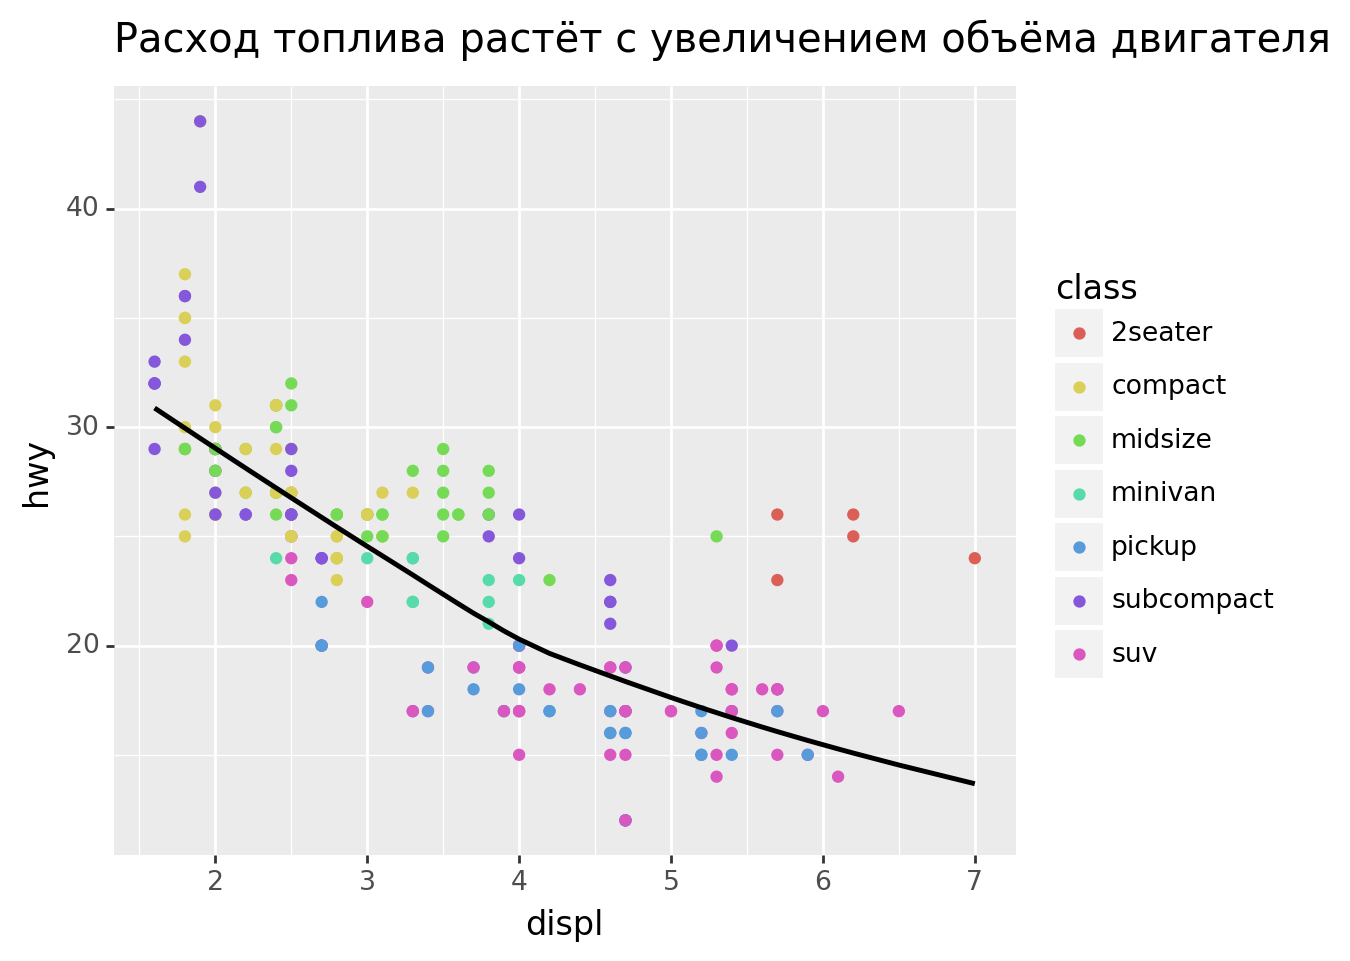

<Figure Size: (640 x 480)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

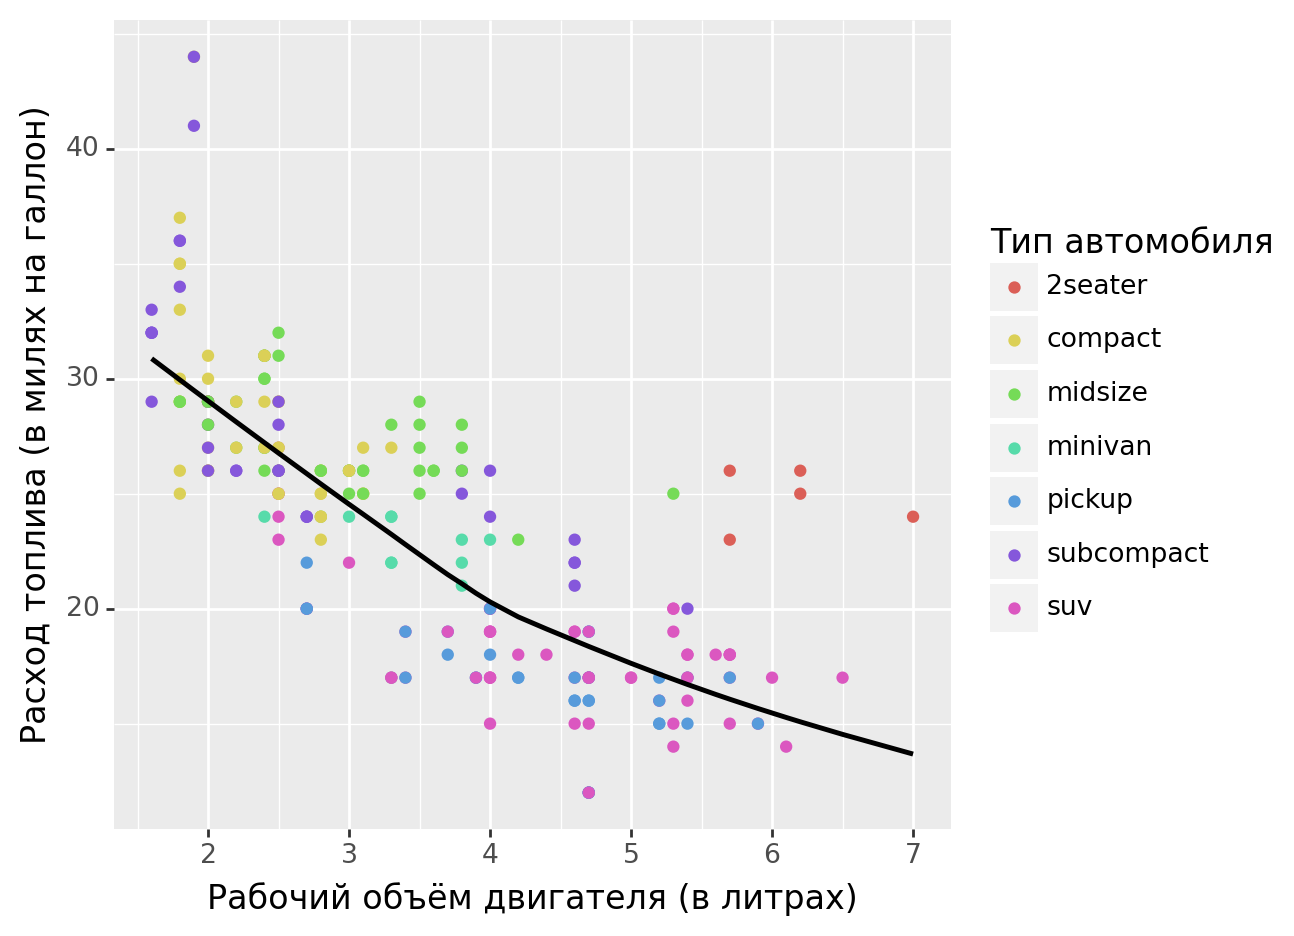

<Figure Size: (640 x 480)>

In [6]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

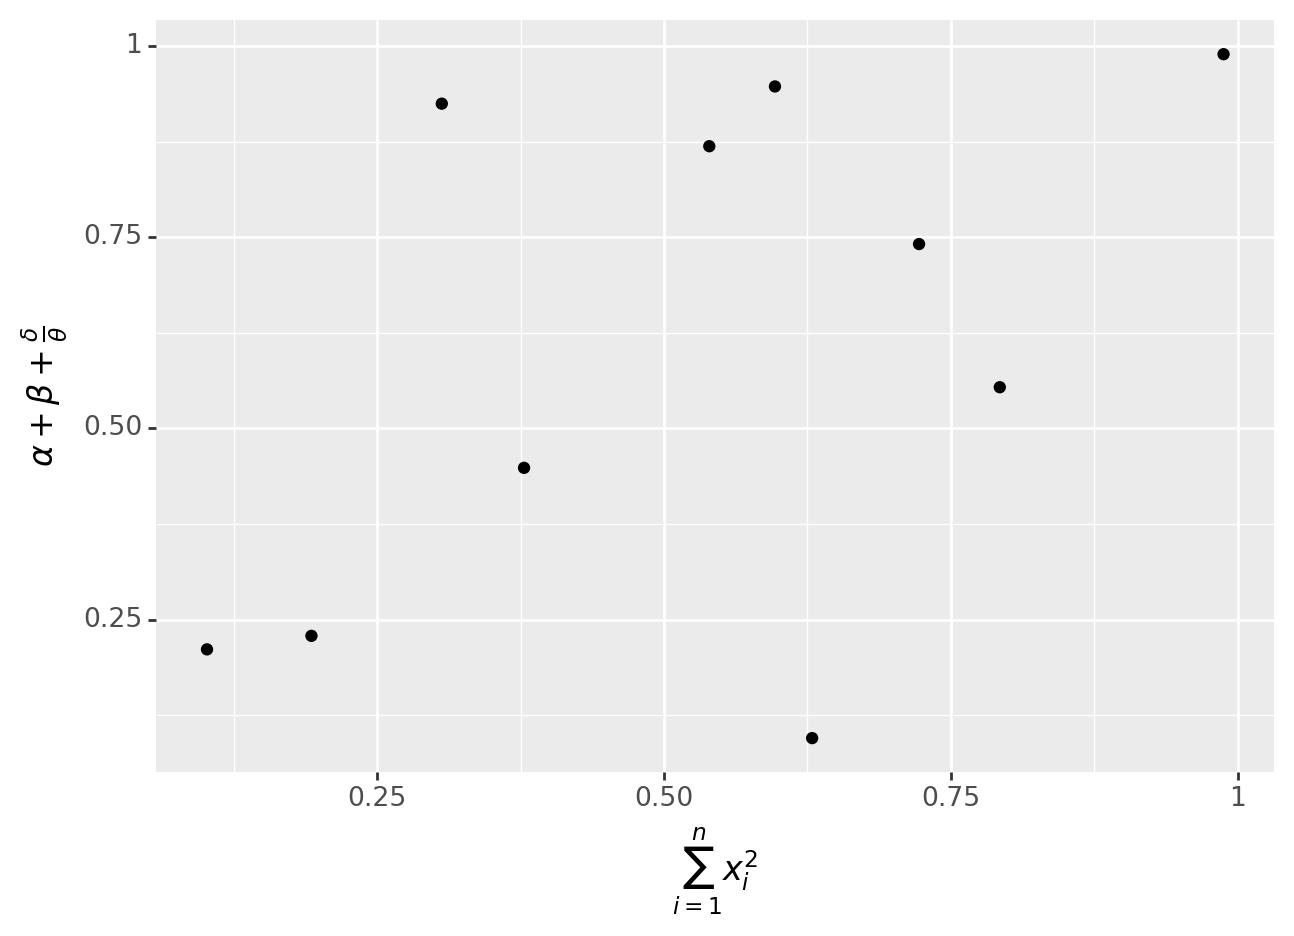

<Figure Size: (640 x 480)>

In [7]:
# from matplotlib import rc
# rc('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$\\sum_{i = 1}^n{x_i^2}$",
     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

## Не забудьте потом отключить эту опцию.

In [8]:
# rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

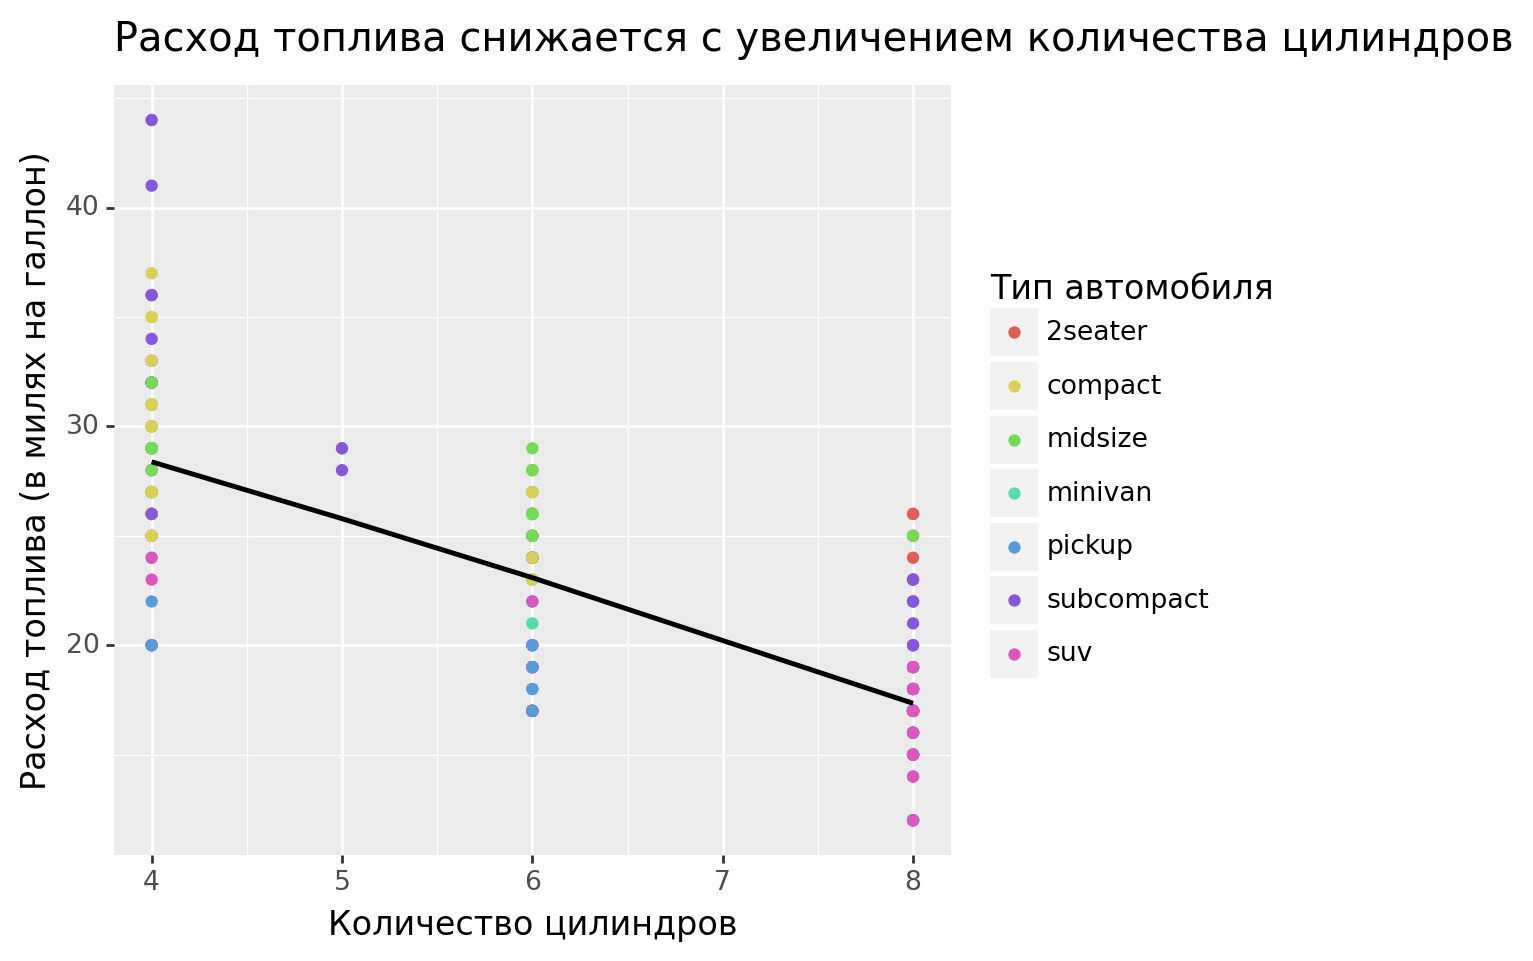

<Figure Size: (640 x 480)>

In [9]:
ggplot(mpg, aes("cyl", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива снижается с увеличением количества цилиндров",
     x="Количество цилиндров",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

In [10]:
ecs = pd.DataFrame(economics)

In [11]:
ecs.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


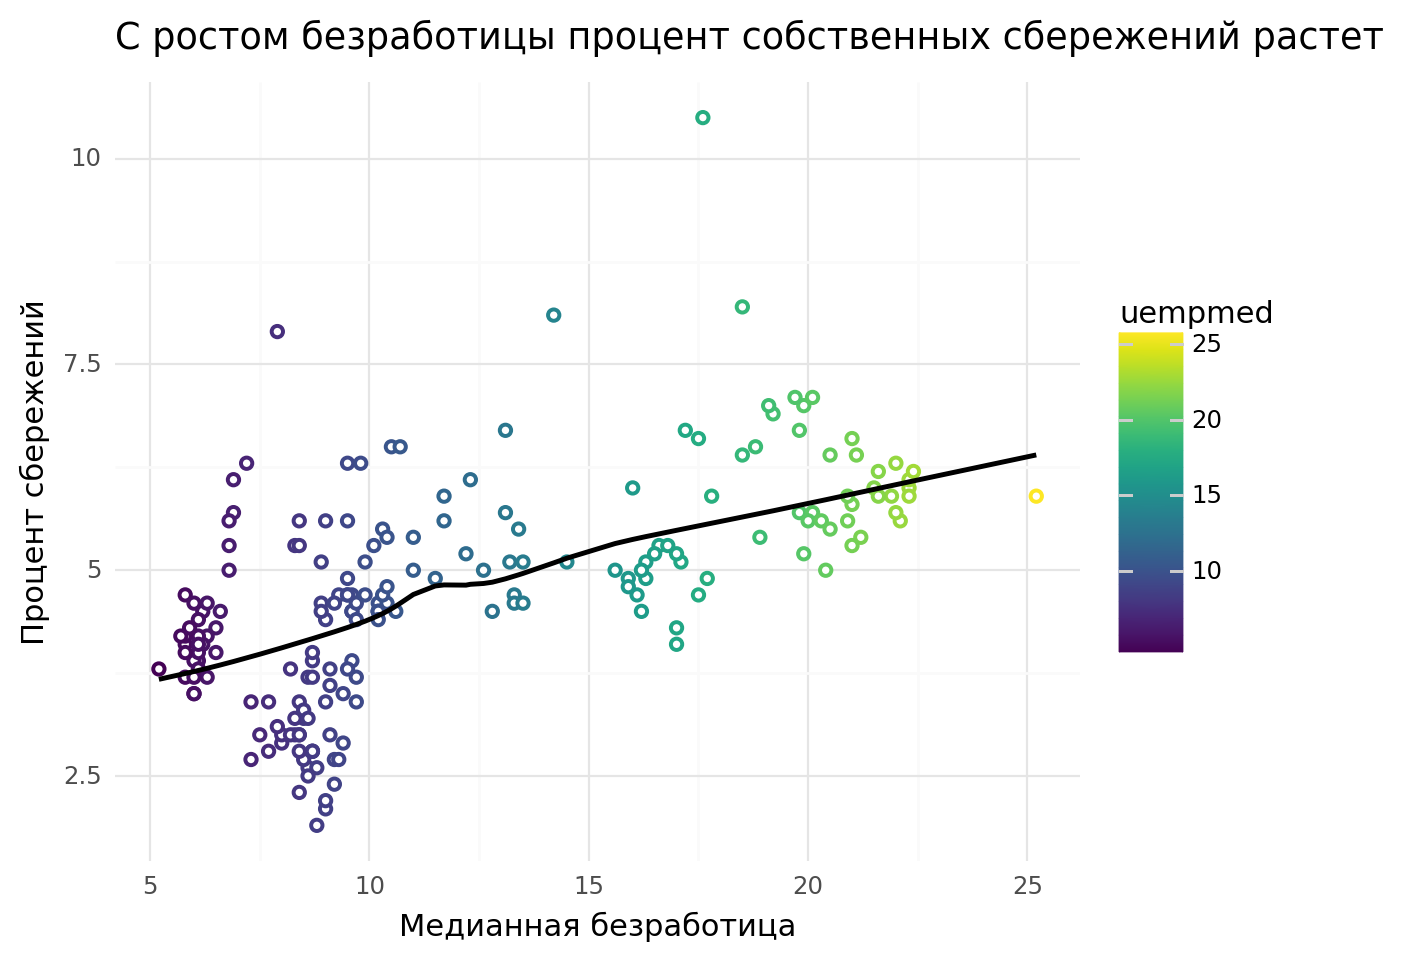

<Figure Size: (640 x 480)>

In [12]:
(ggplot(data=ecs.loc[ecs['date'] >= '1999-01-01']) +
 aes(x='uempmed', y='psavert', color="uempmed") +
 geom_point(fill = "white", stroke=0.8) +
 labs(title='С ростом безработицы процент собственных сбережений растет', x='Медианная безработица', y='Процент сбережений') +
 theme_minimal() +
 geom_smooth(se=False)
)

Можно заметить, что с большей продолжительностью безработицы процент сбережений увеличивается и наоборот. Это связано с тем, что в периоды экономической нестабильности и роста безработицы люди склонны экономить больше, так как они могут столкнуться с финансовой неопределенностью и не уверены в будущем


## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

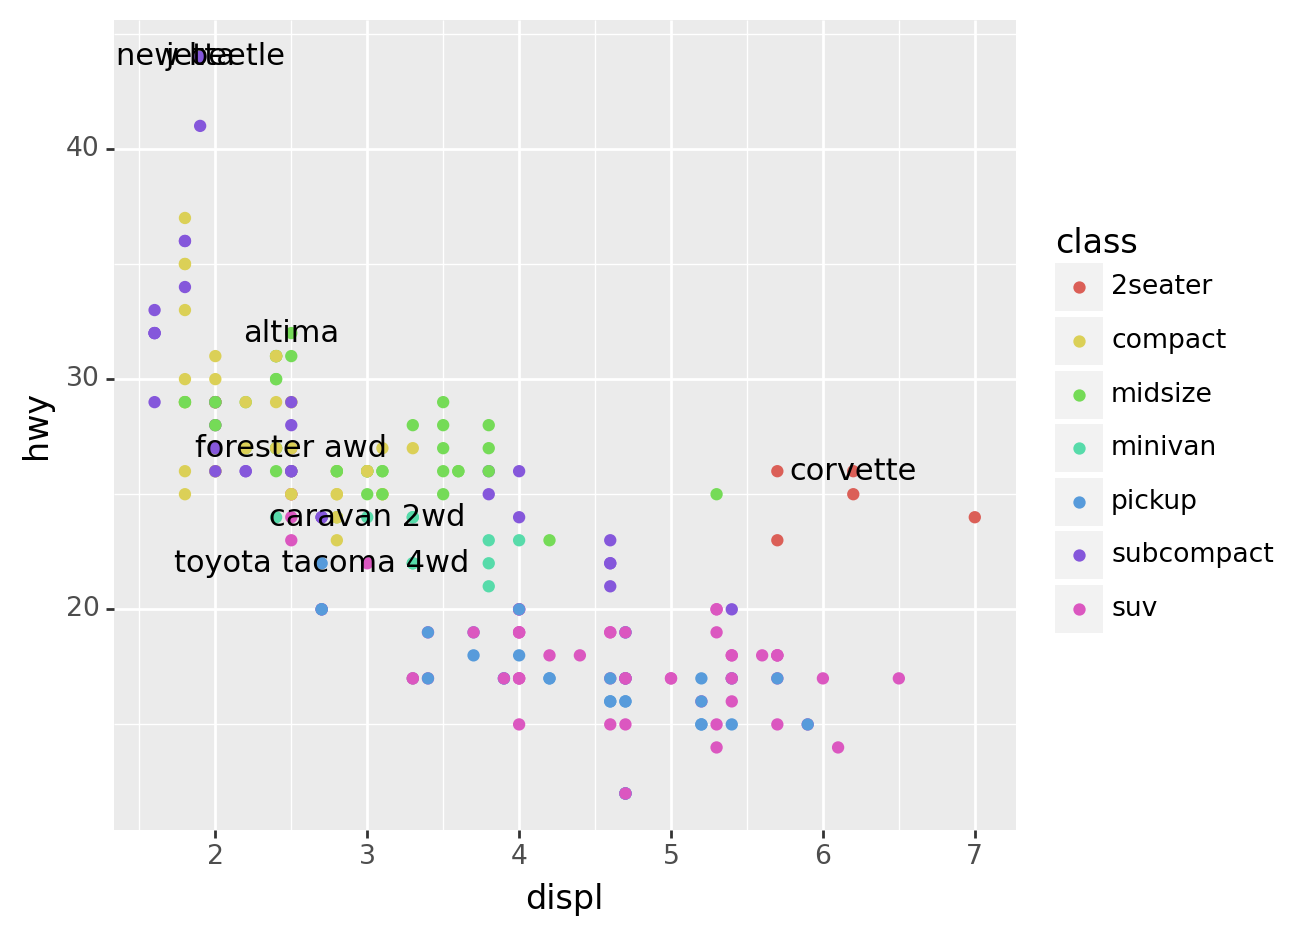

<Figure Size: (640 x 480)>

In [13]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

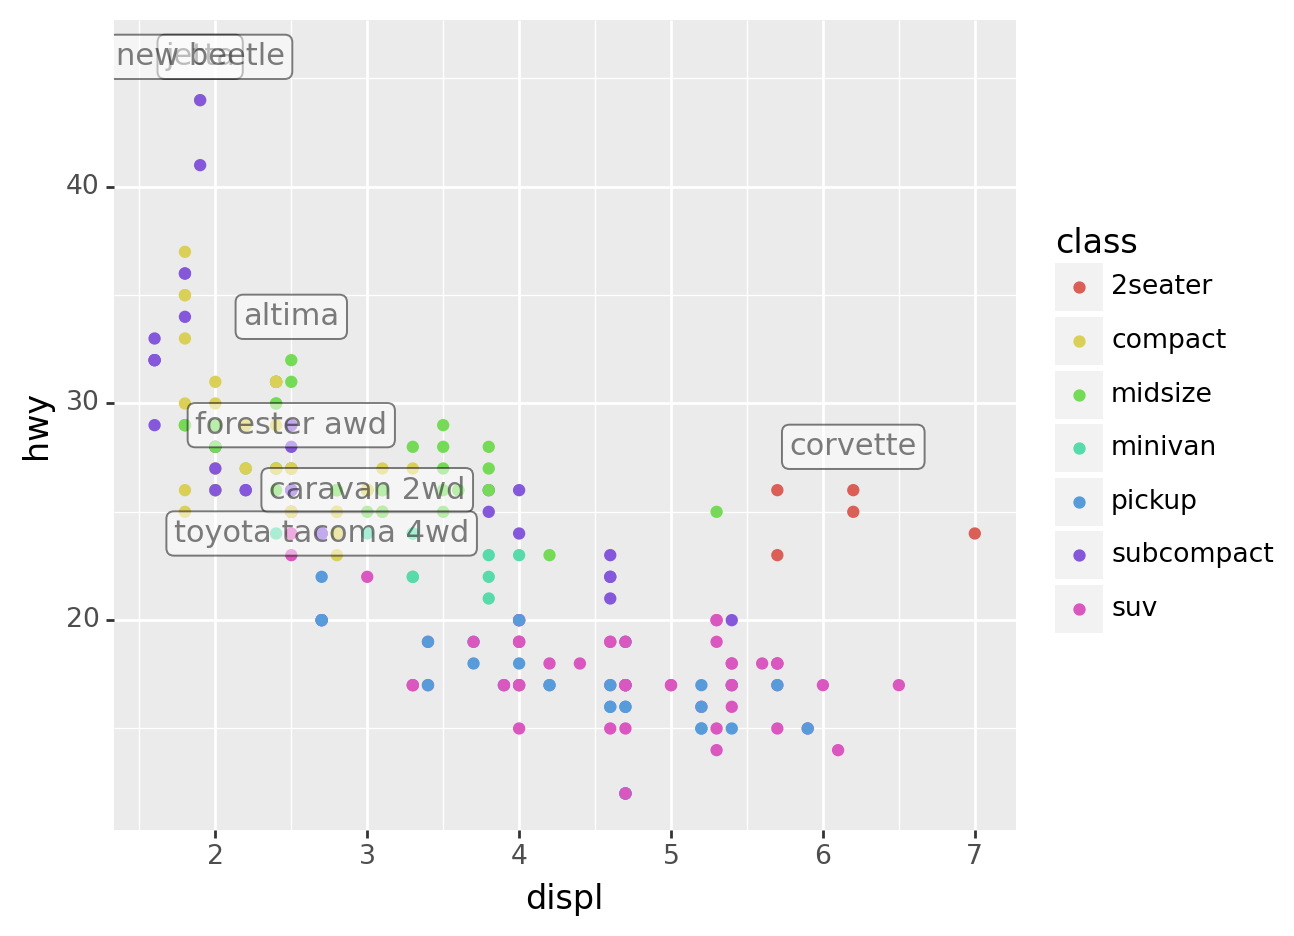

<Figure Size: (640 x 480)>

In [14]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

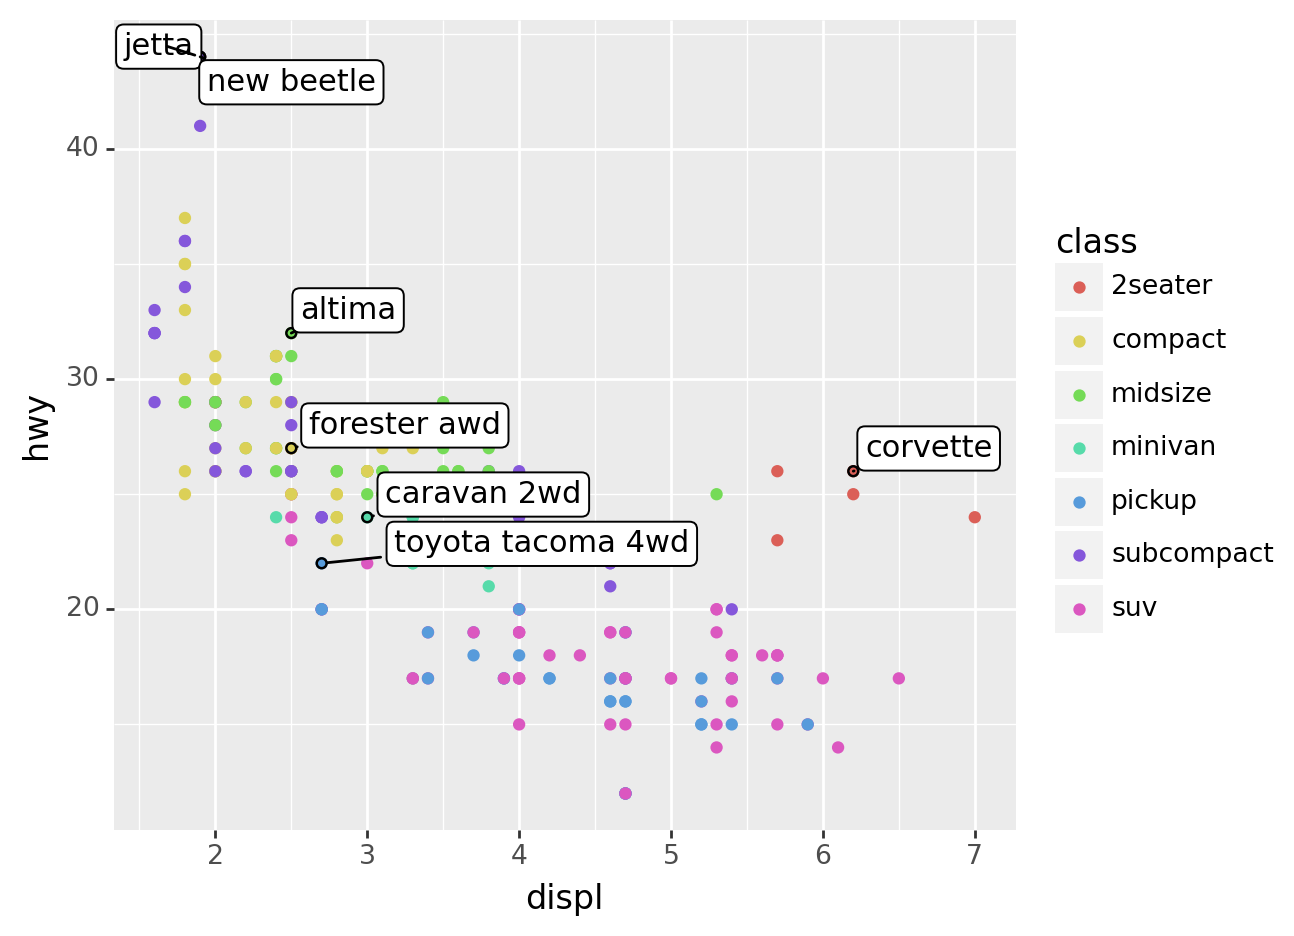

<Figure Size: (640 x 480)>

In [15]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text={
    'expand_points': (1.2, 1.5),
    'arrowprops': {
        'arrowstyle': '-'
    }})

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

<ipython-input-16-f6a976a0e248>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


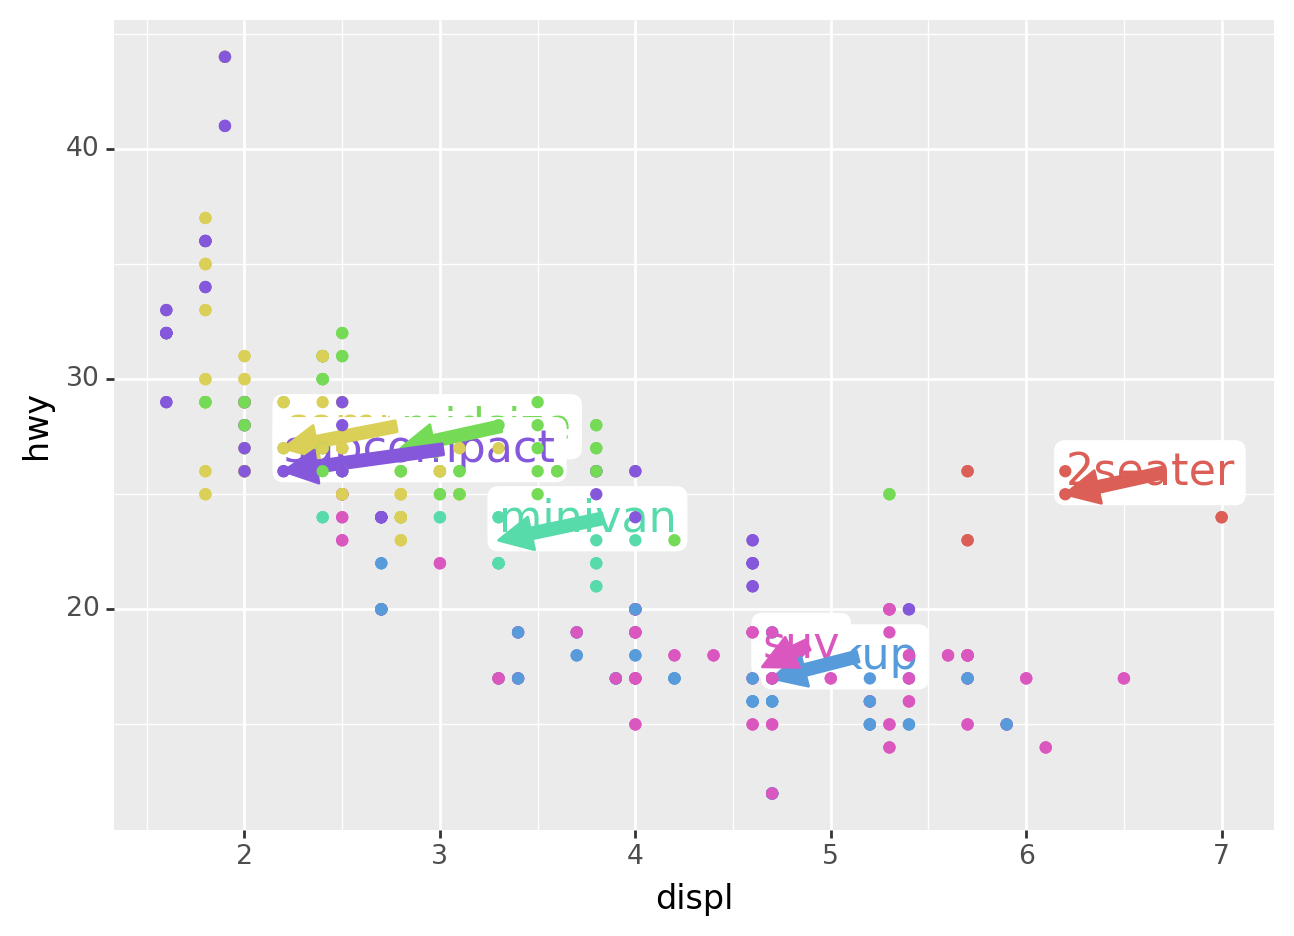

<Figure Size: (640 x 480)>

In [16]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame.

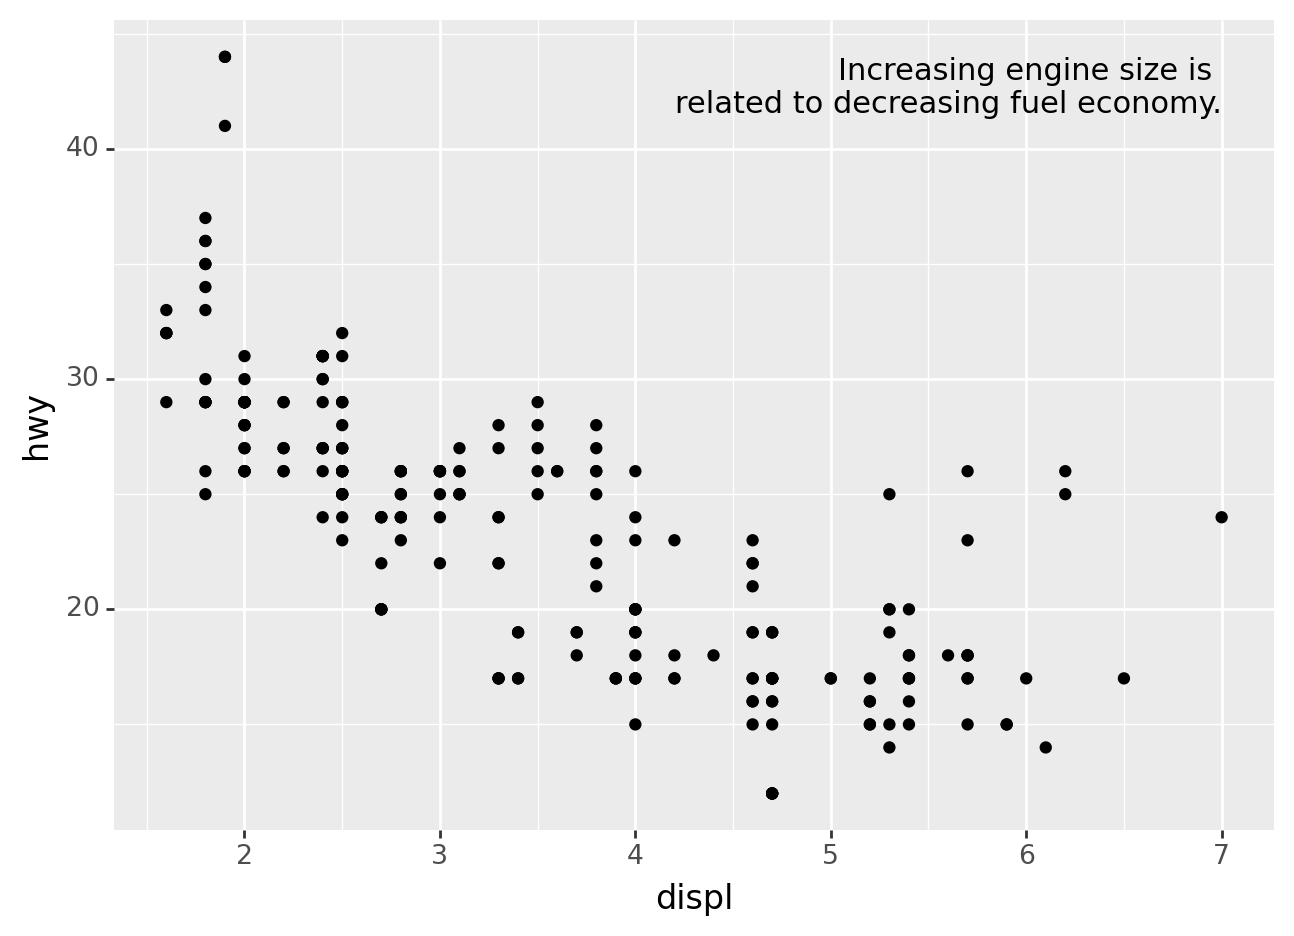

<Figure Size: (640 x 480)>

In [17]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

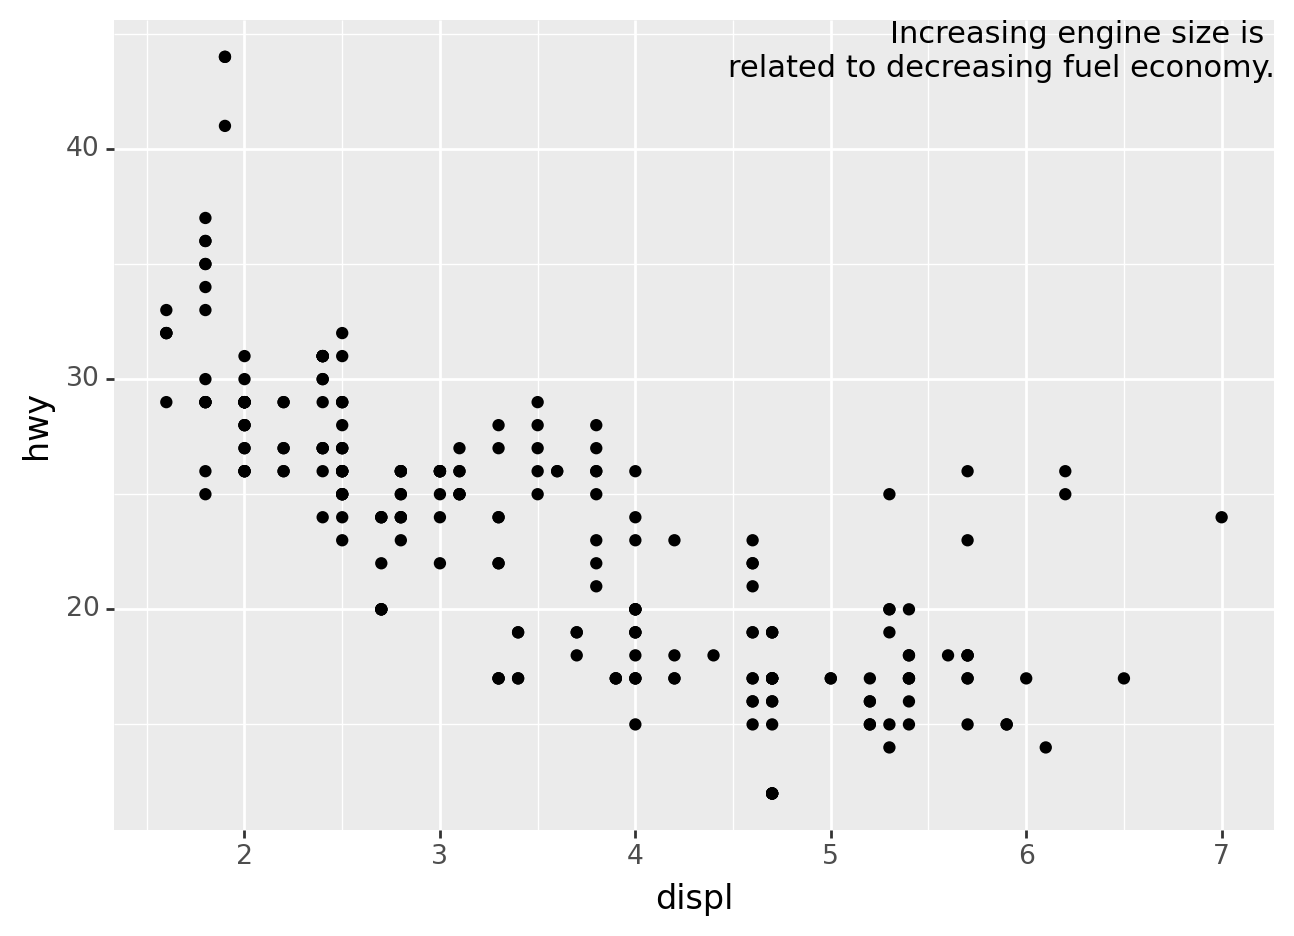

<Figure Size: (640 x 480)>

In [18]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [19]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.



## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

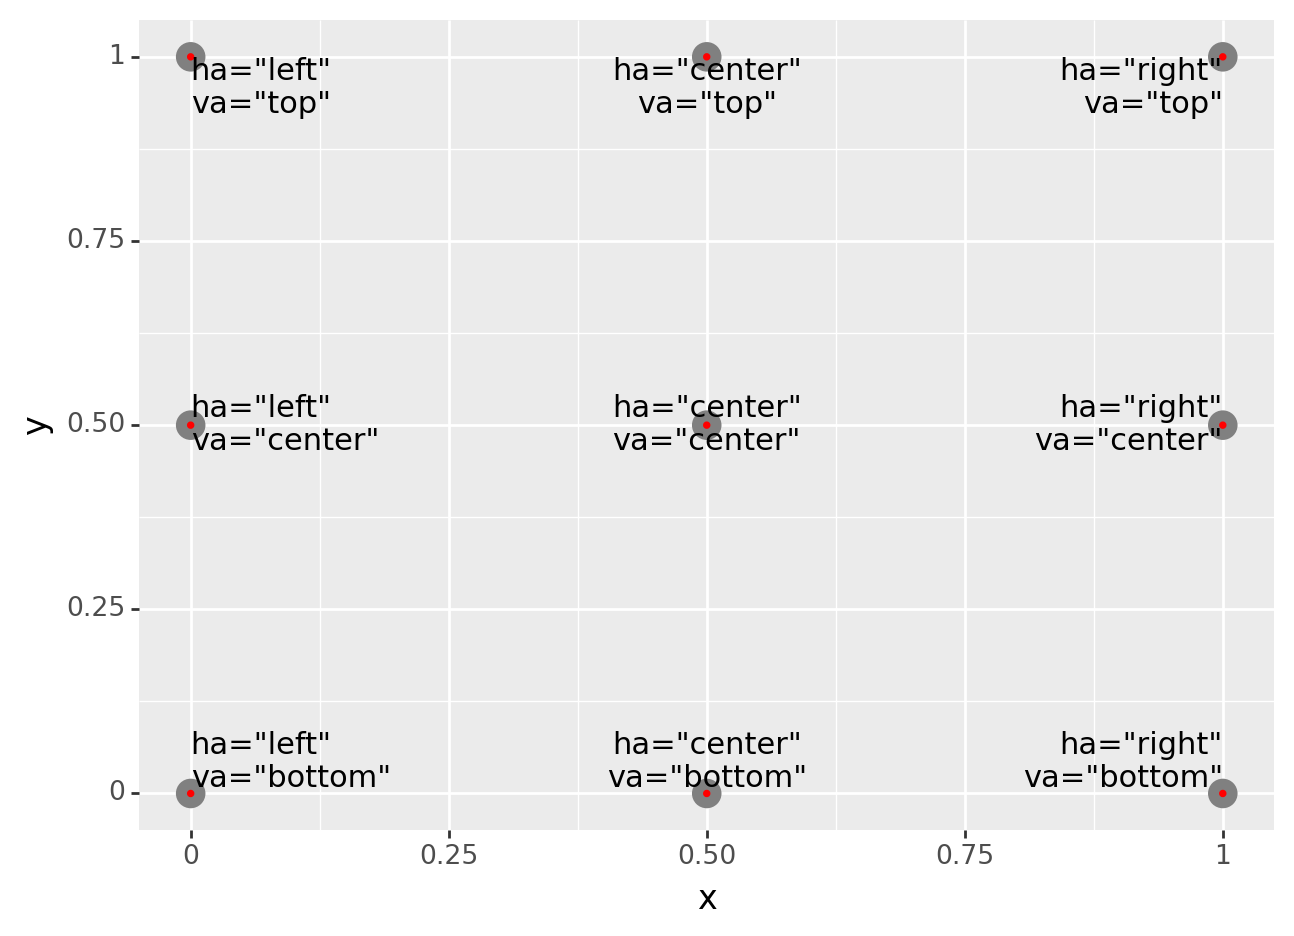

<Figure Size: (640 x 480)>

In [20]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

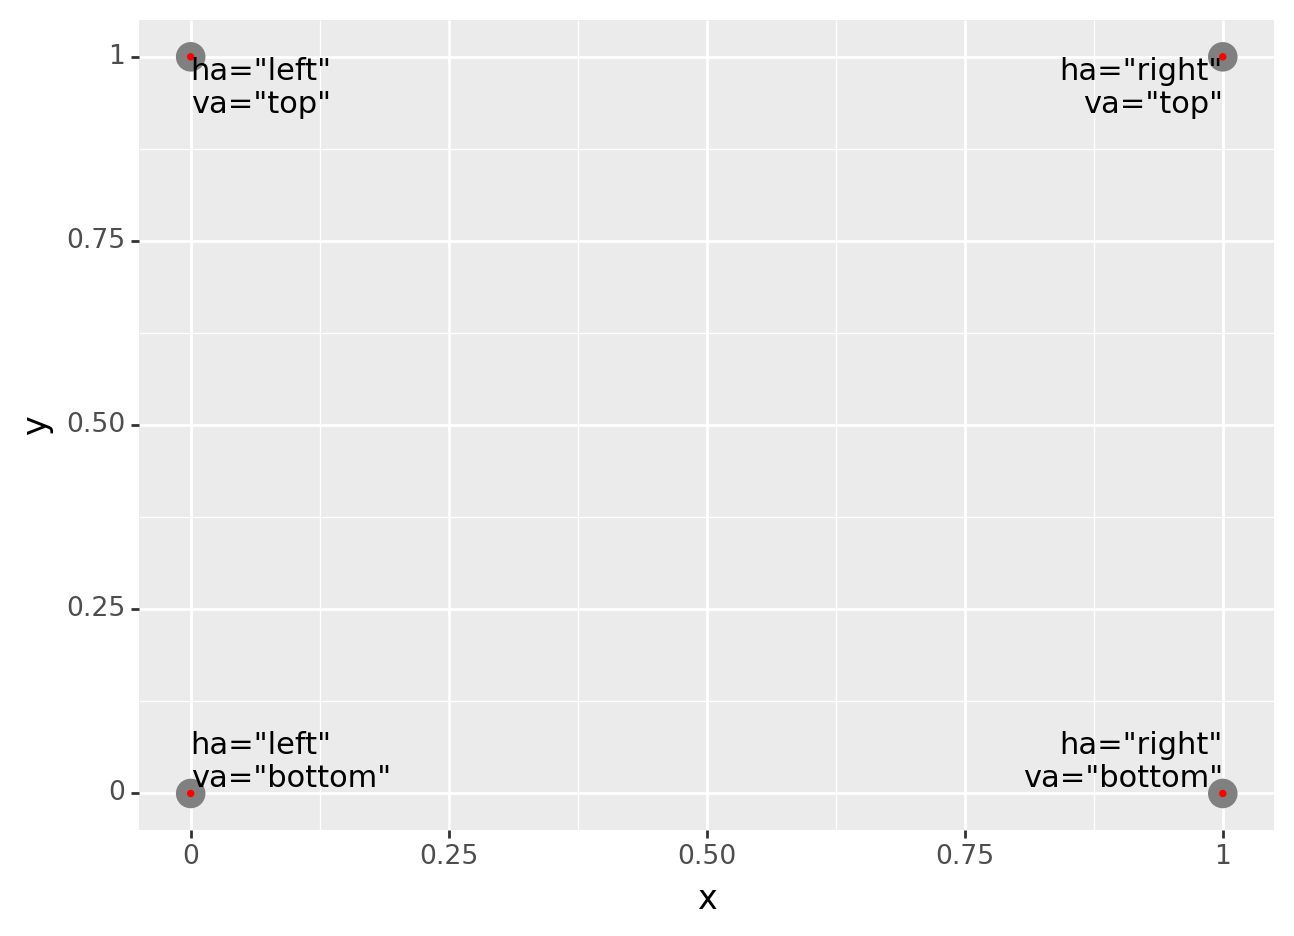

<Figure Size: (640 x 480)>

In [21]:
has = ["left", "right"]
vas = ["top", "bottom"]
xs = [0, 1]
ys = [1, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

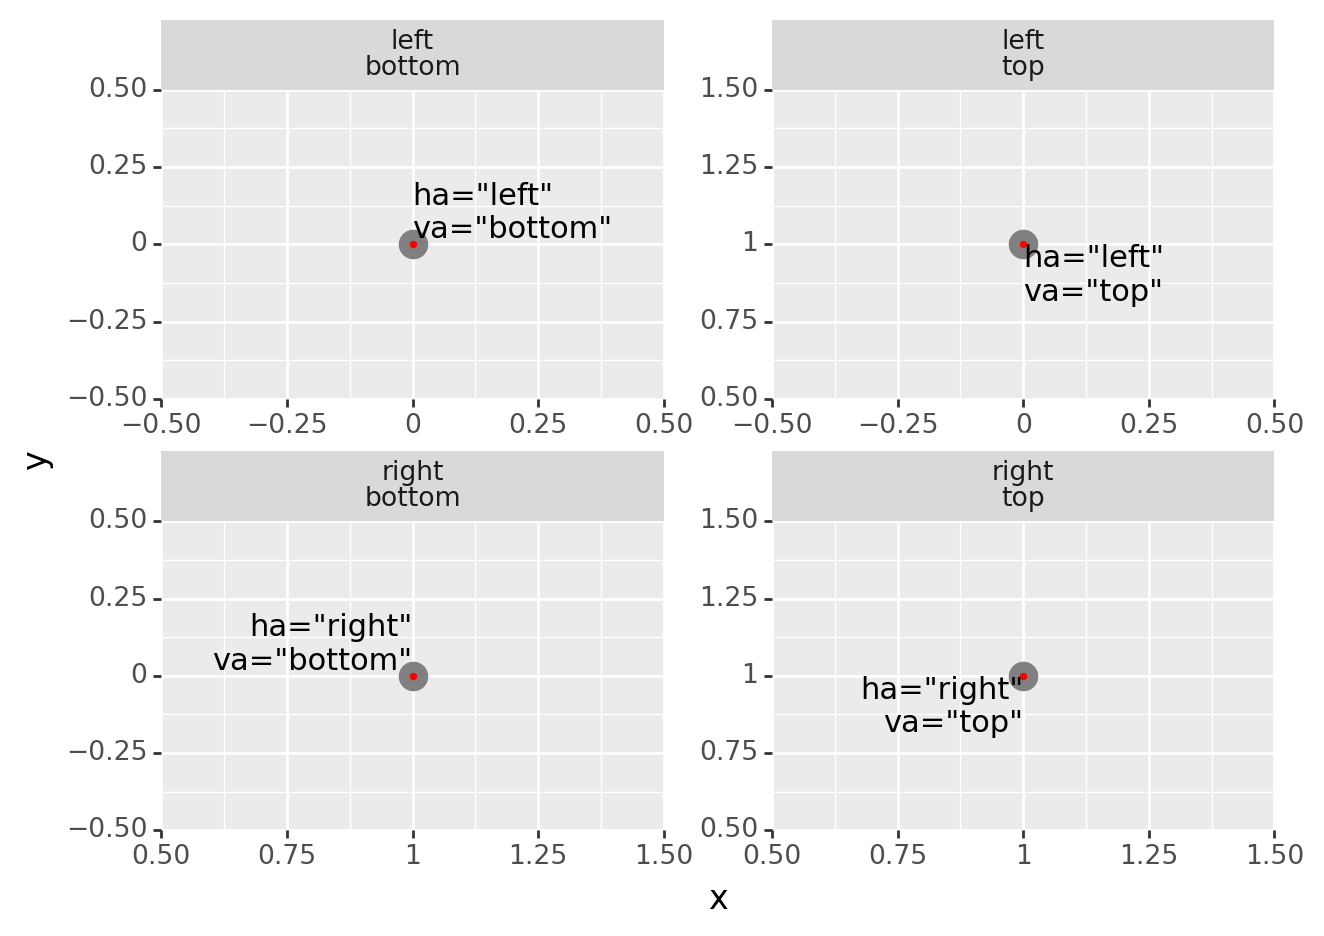

<Figure Size: (640 x 480)>

In [22]:
has = ["left", "right"]
vas = ["top", "bottom"]
xs = [0, 1]
ys = [1, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])

ggplot(df, aes("x", "y")) +\
    geom_point(colour="grey", size=5) +\
    geom_point(size=0.5, colour="red") +\
    geom_text(aes(label="label", ha="ha", va="va")) +\
    labs(x=None, y=None) +\
    facet_wrap("~ha+va", scales="free")

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

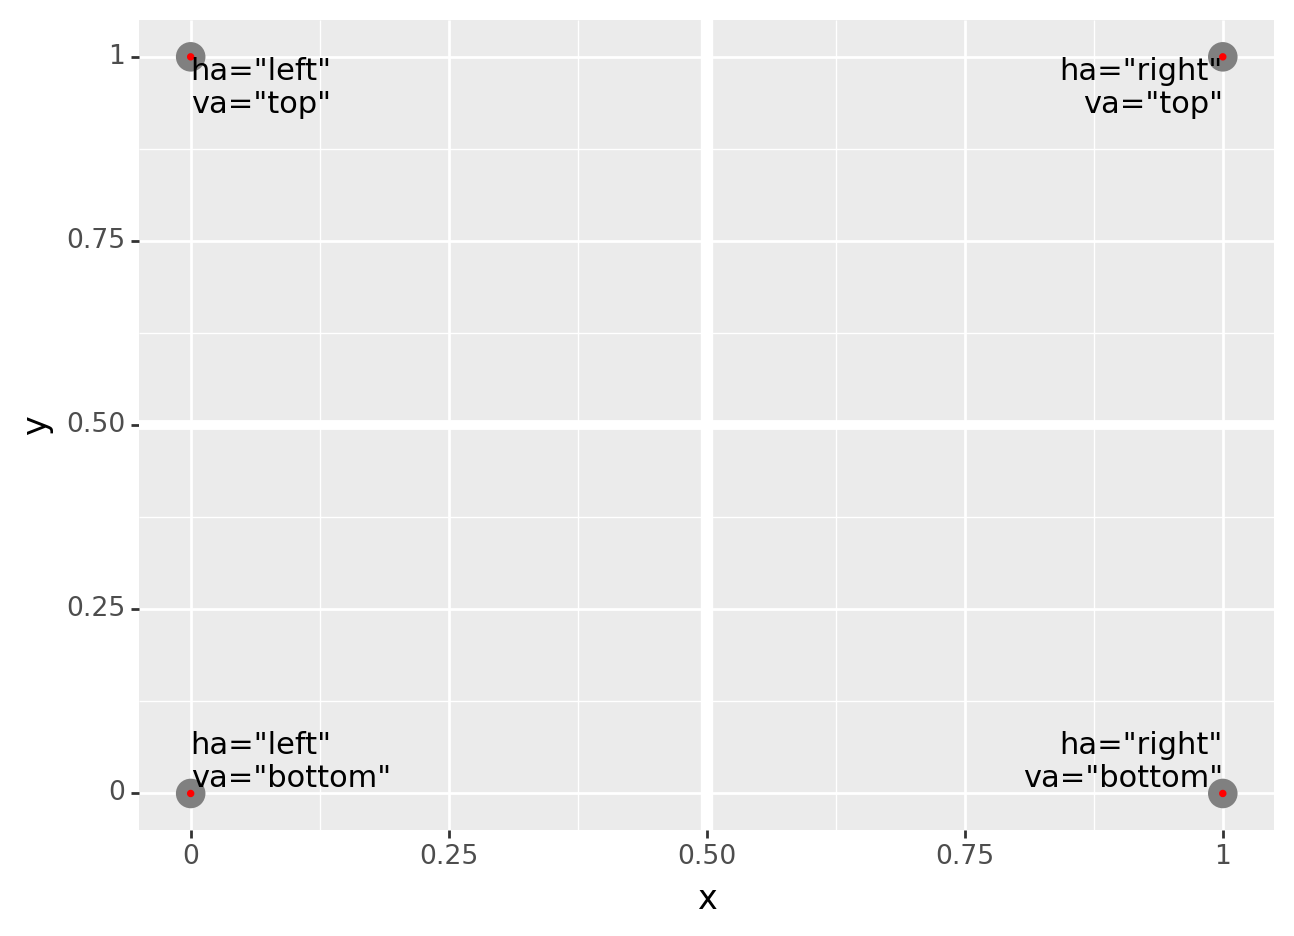

<Figure Size: (640 x 480)>

In [23]:
ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_hline(yintercept=np.mean(df['y']), size=2, colour="white") +\
geom_vline(data=df, mapping=aes(xintercept=np.mean(df['x'])), size=2.5, colour="white") +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

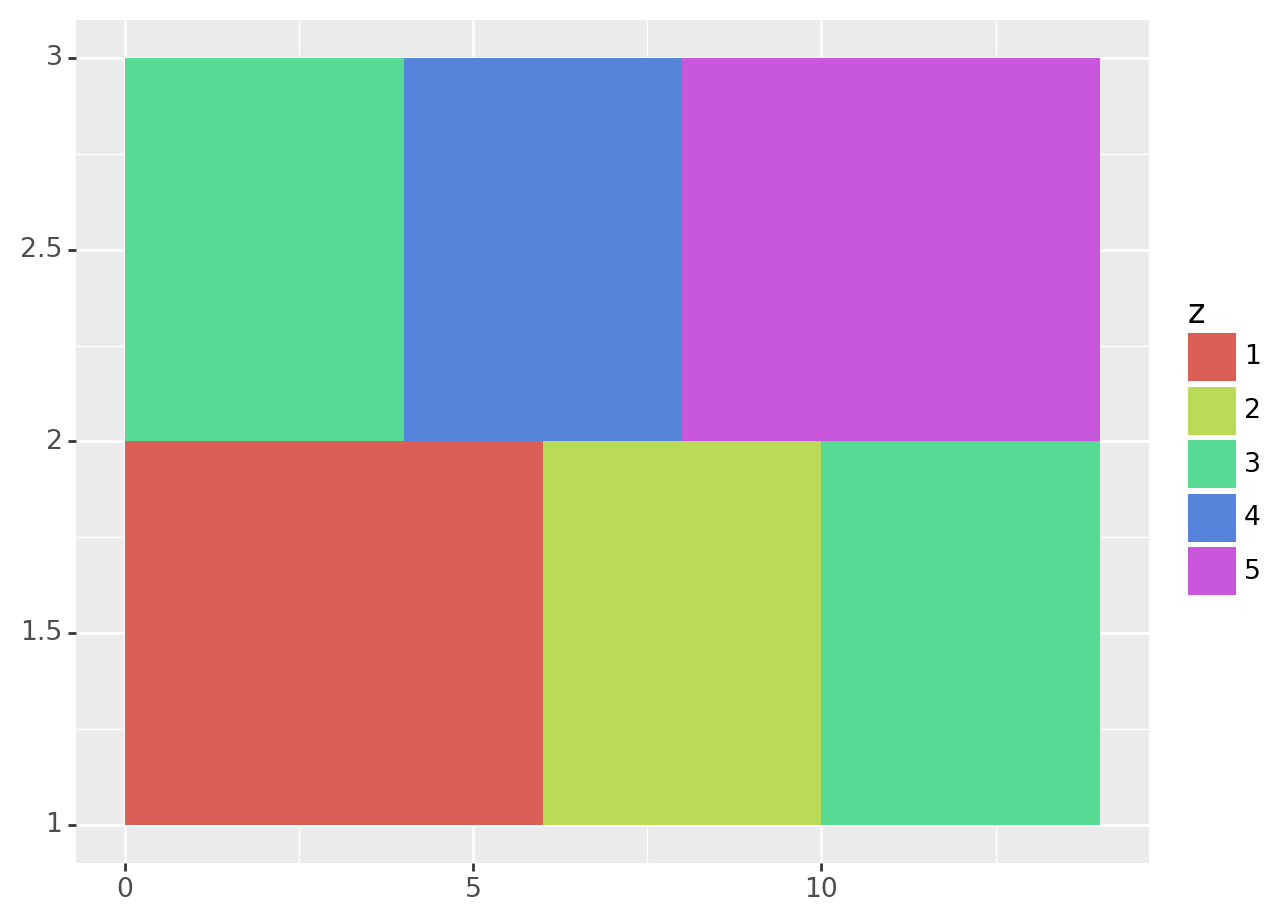

<Figure Size: (640 x 480)>

In [24]:
df = pd.DataFrame([{"x":2,"y":1,"z":"1","w":4},
                   {"x":5,"y":1,"z":"1","w":2},
                   {"x":7,"y":1,"z":"2","w":2},
                   {"x":9,"y":1,"z":"2","w":2},
                   {"x":12,"y":1,"z":"3","w":4},
                   {"x":2,"y":2,"z":"3","w":4},
                   {"x":5,"y":2,"z":"4","w":2},
                   {"x":7,"y":2,"z":"4","w":2},
                   {"x":9,"y":2,"z":"5","w":2},
                   {"x":12,"y":2,"z":"5","w":4}])
ggplot(df, aes(xmin='x - w / 2', xmax='x + w / 2', ymin='y', ymax='y + 1', fill='z')) + geom_rect()

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

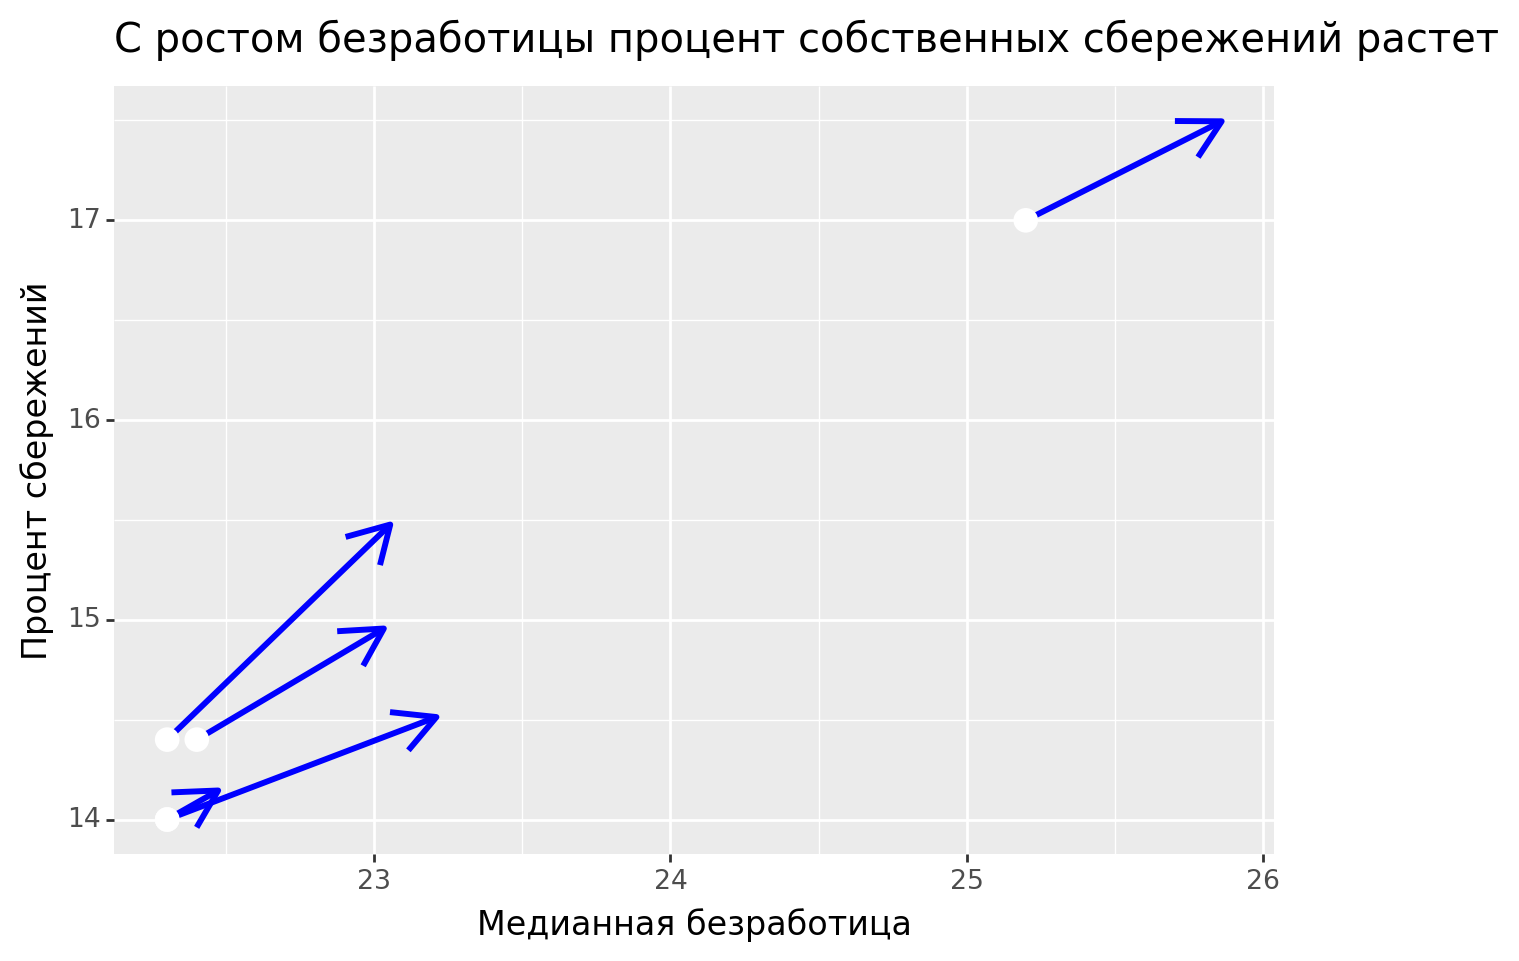

<Figure Size: (640 x 480)>

In [25]:
d = pd.DataFrame({
    'x': ecs['uempmed'].nlargest(5).values,
    'y': ecs['psavert'].nlargest(5).values
})
vx = np.random.uniform(0, 1, size=len(d['x']))
vy = np.random.uniform(0, 2, size=len(d['x']))

ggplot() +\
geom_segment(data=d, mapping=aes(x='x', y='y', xend=d['x']+vx, yend=d['y']+vy), arrow=arrow(), size=1.2, color="blue") +\
geom_point(data=d, mapping=aes(x='x', y='y'), size=4, color="white") +\
labs(title='С ростом безработицы процент собственных сбережений растет', x='Медианная безработица', y='Процент сбережений')

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

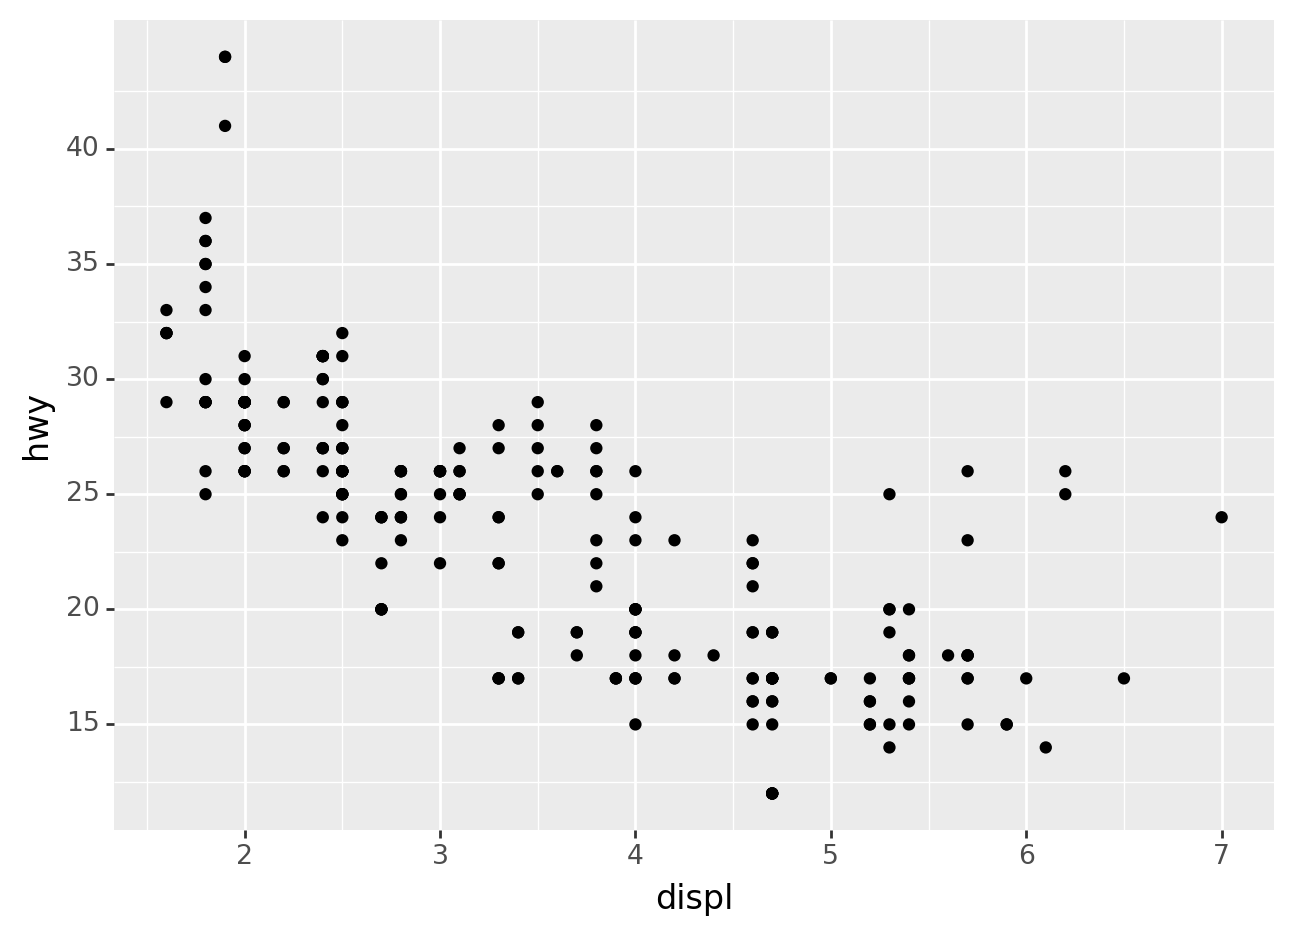

<Figure Size: (640 x 480)>

In [26]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

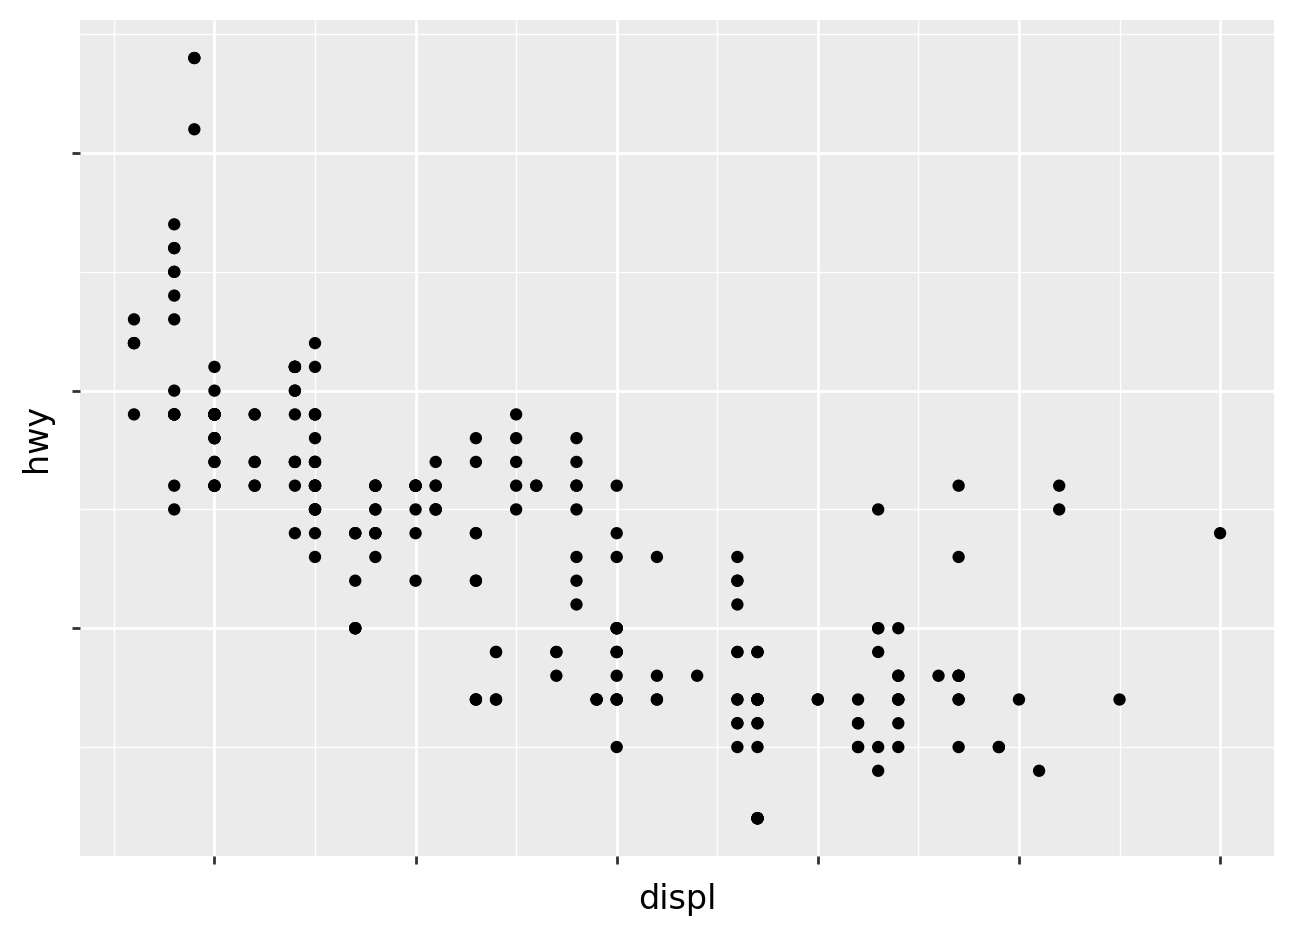

<Figure Size: (640 x 480)>

In [27]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

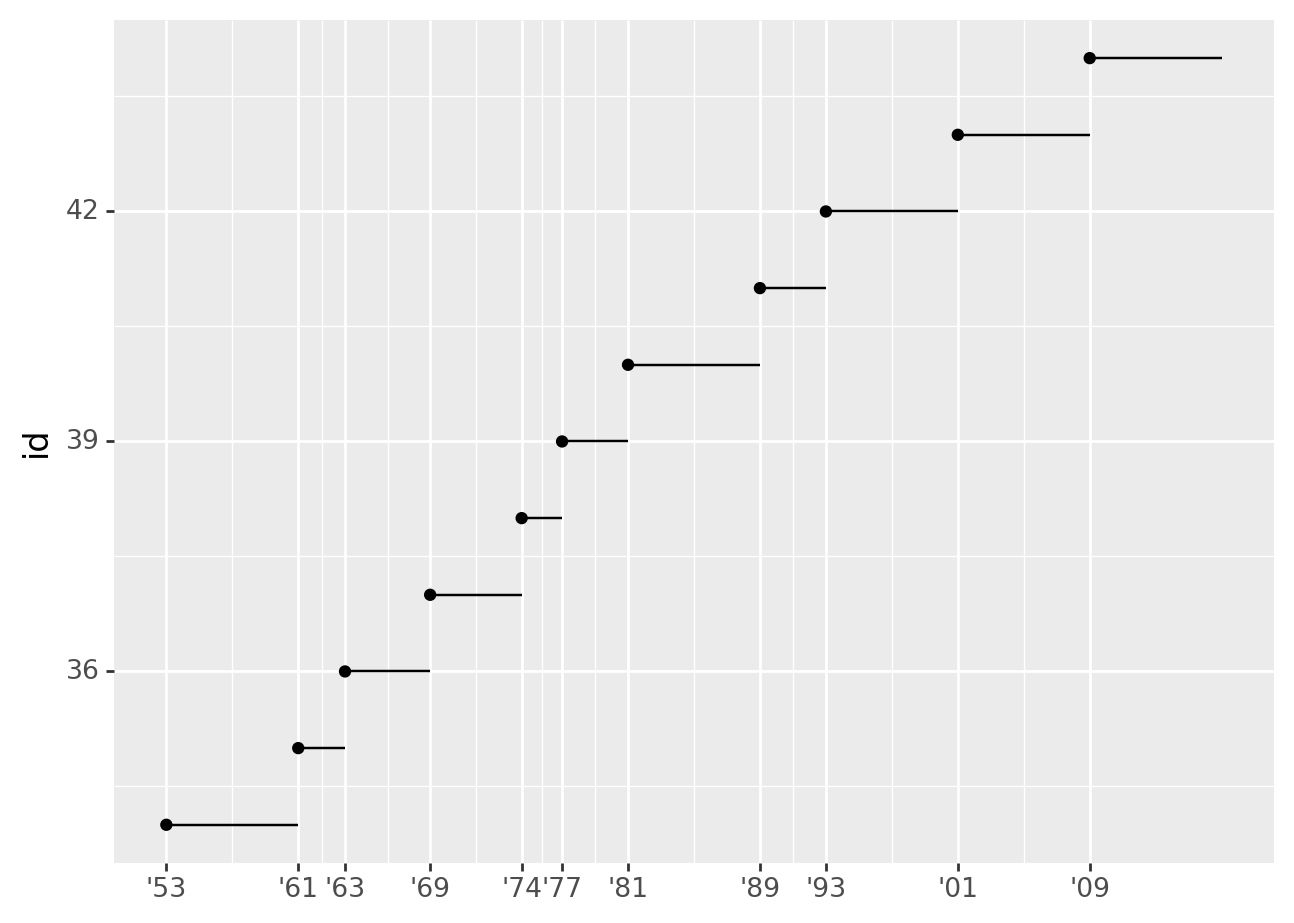

<Figure Size: (640 x 480)>

In [28]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [29]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

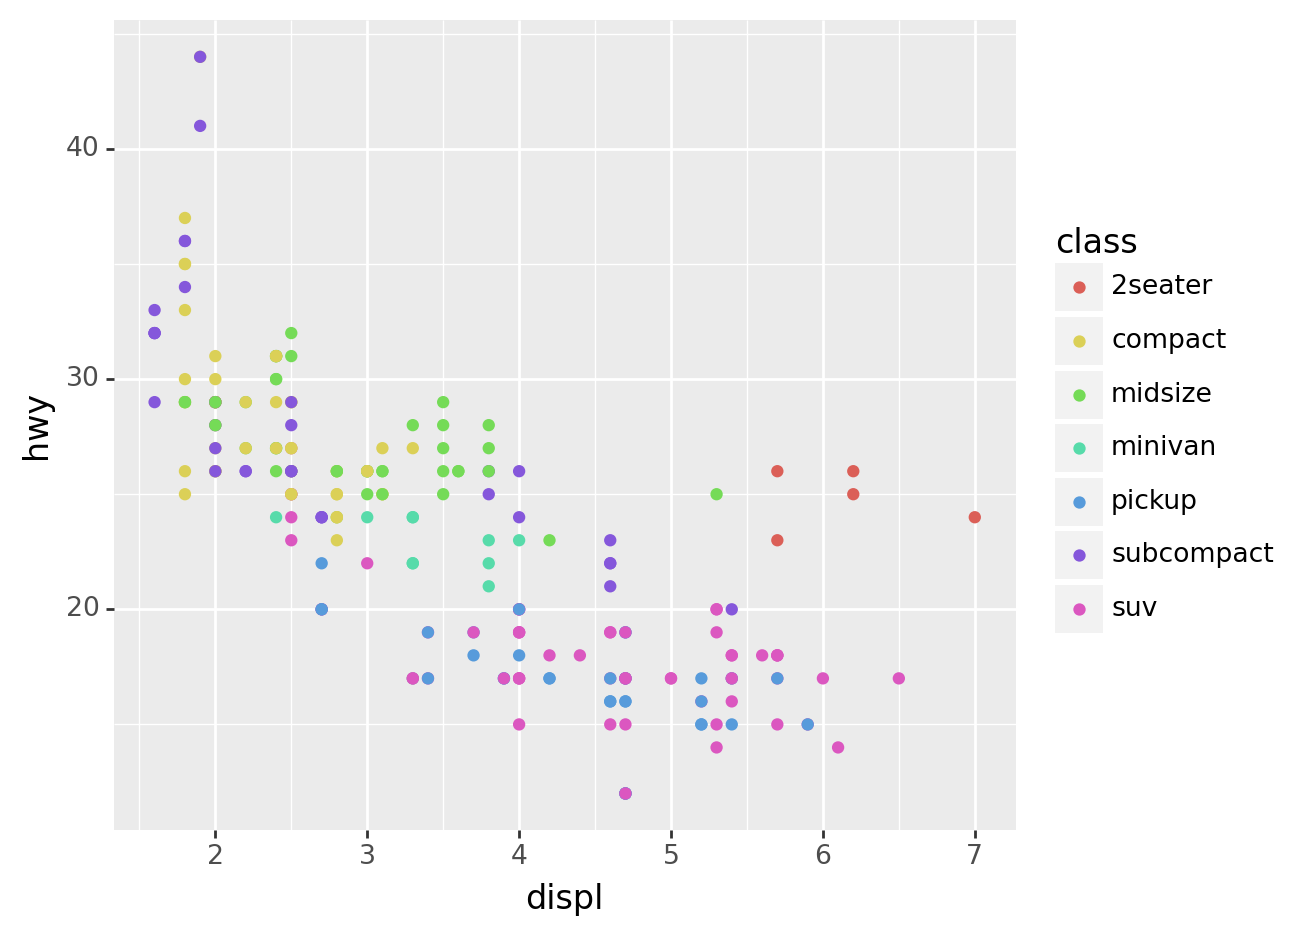

<Figure Size: (640 x 480)>

In [30]:
base + theme(legend_position="right")

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


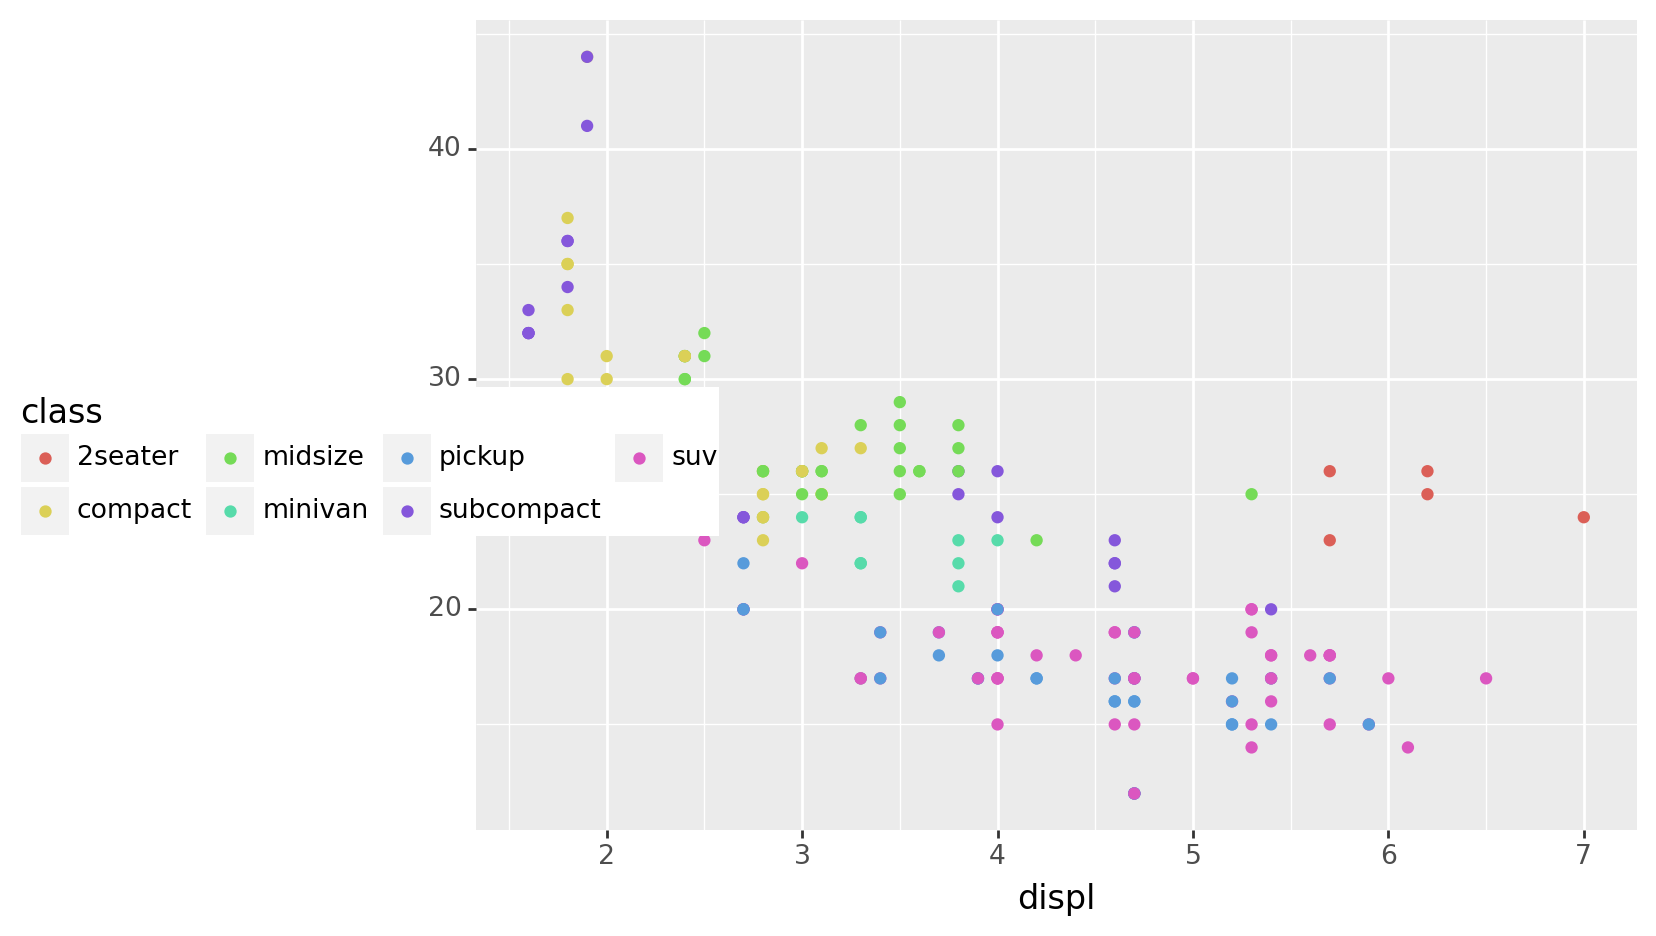

<Figure Size: (640 x 480)>

In [31]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

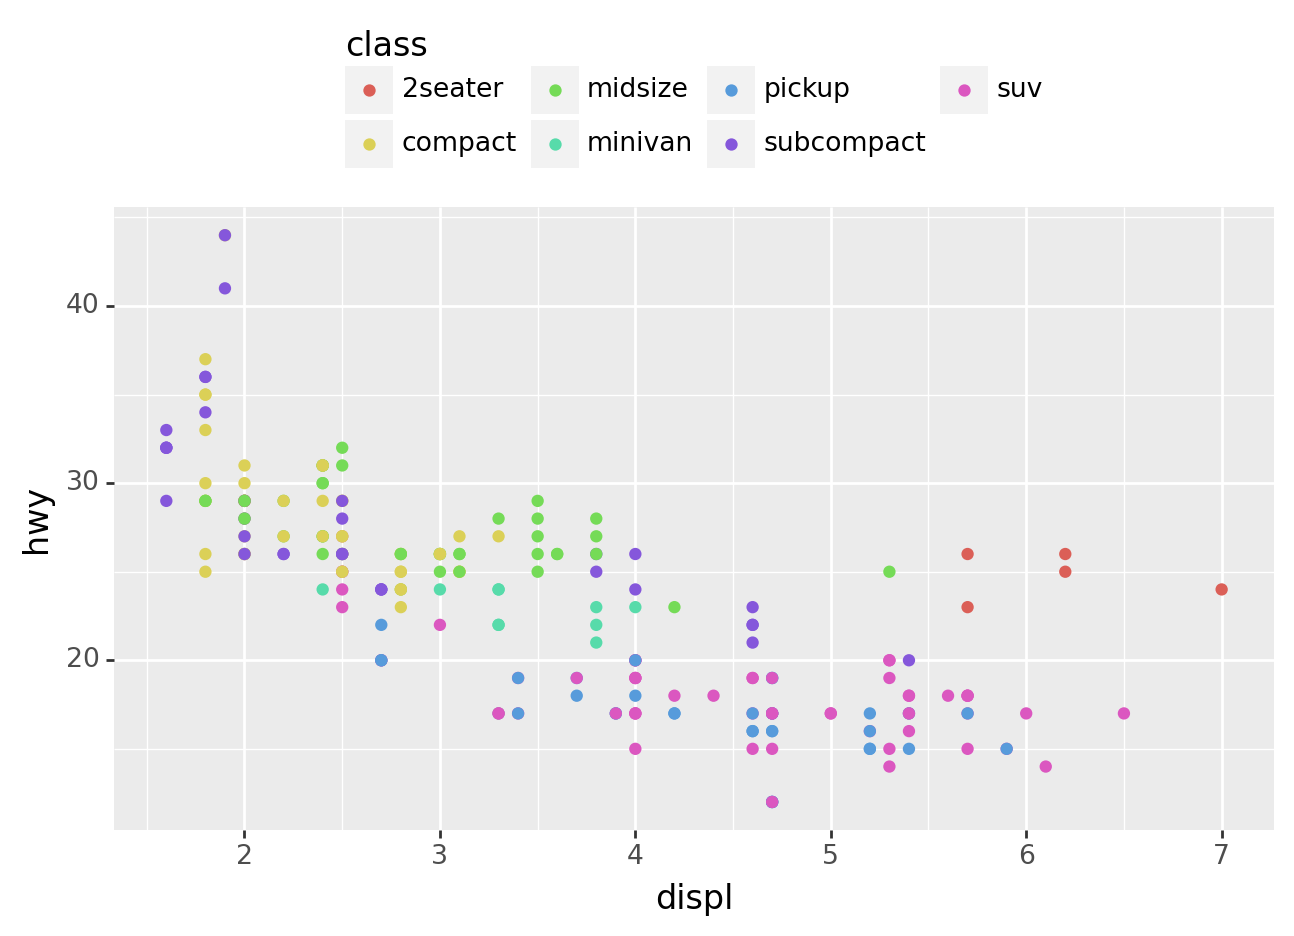

<Figure Size: (640 x 480)>

In [32]:
base + theme(legend_position="top")

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


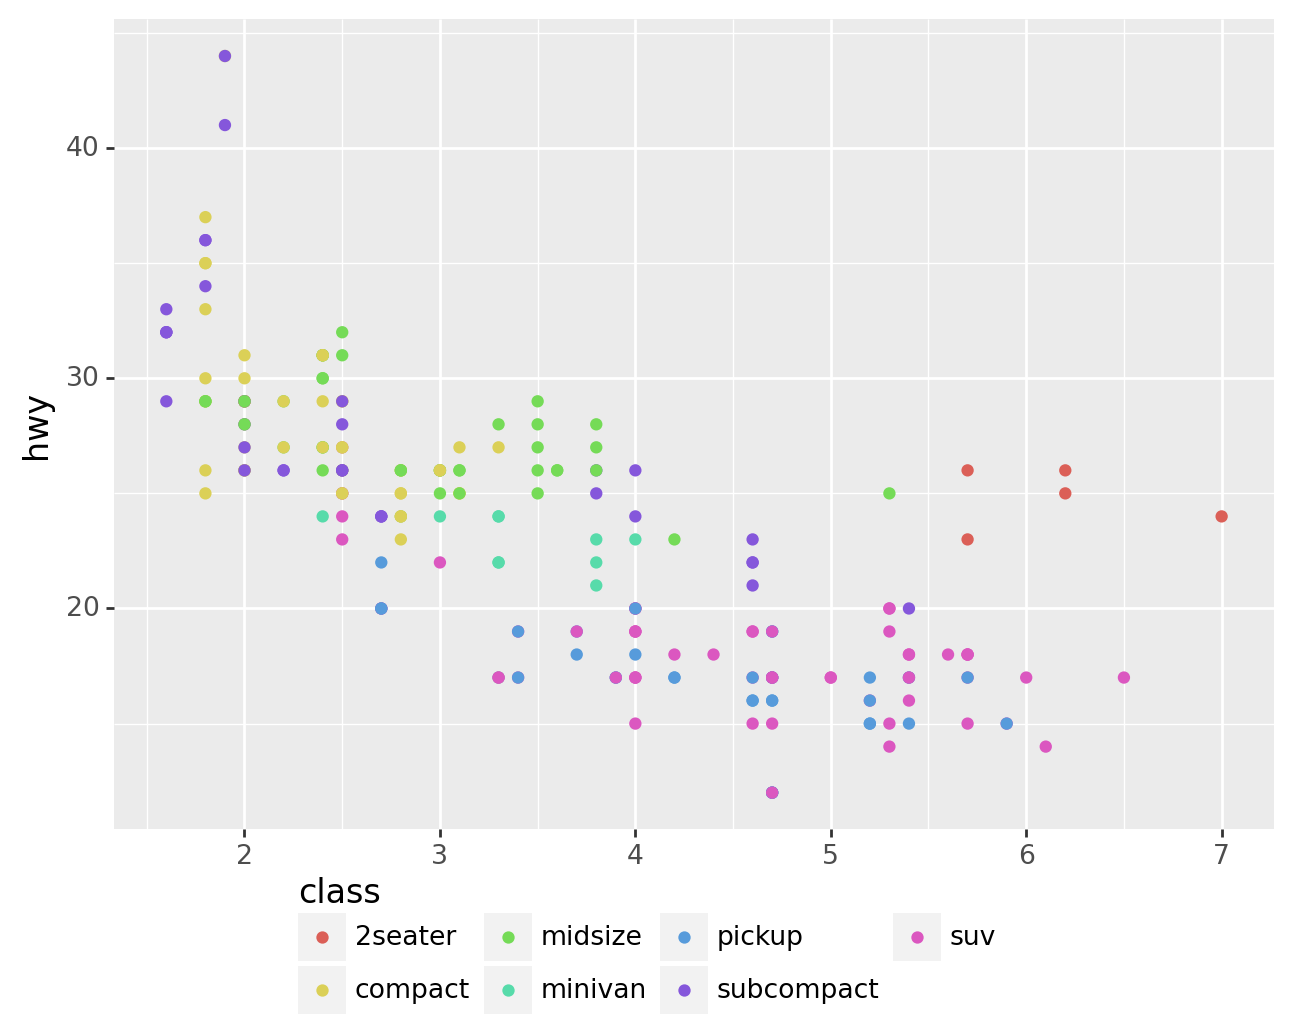

<Figure Size: (640 x 480)>

In [33]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

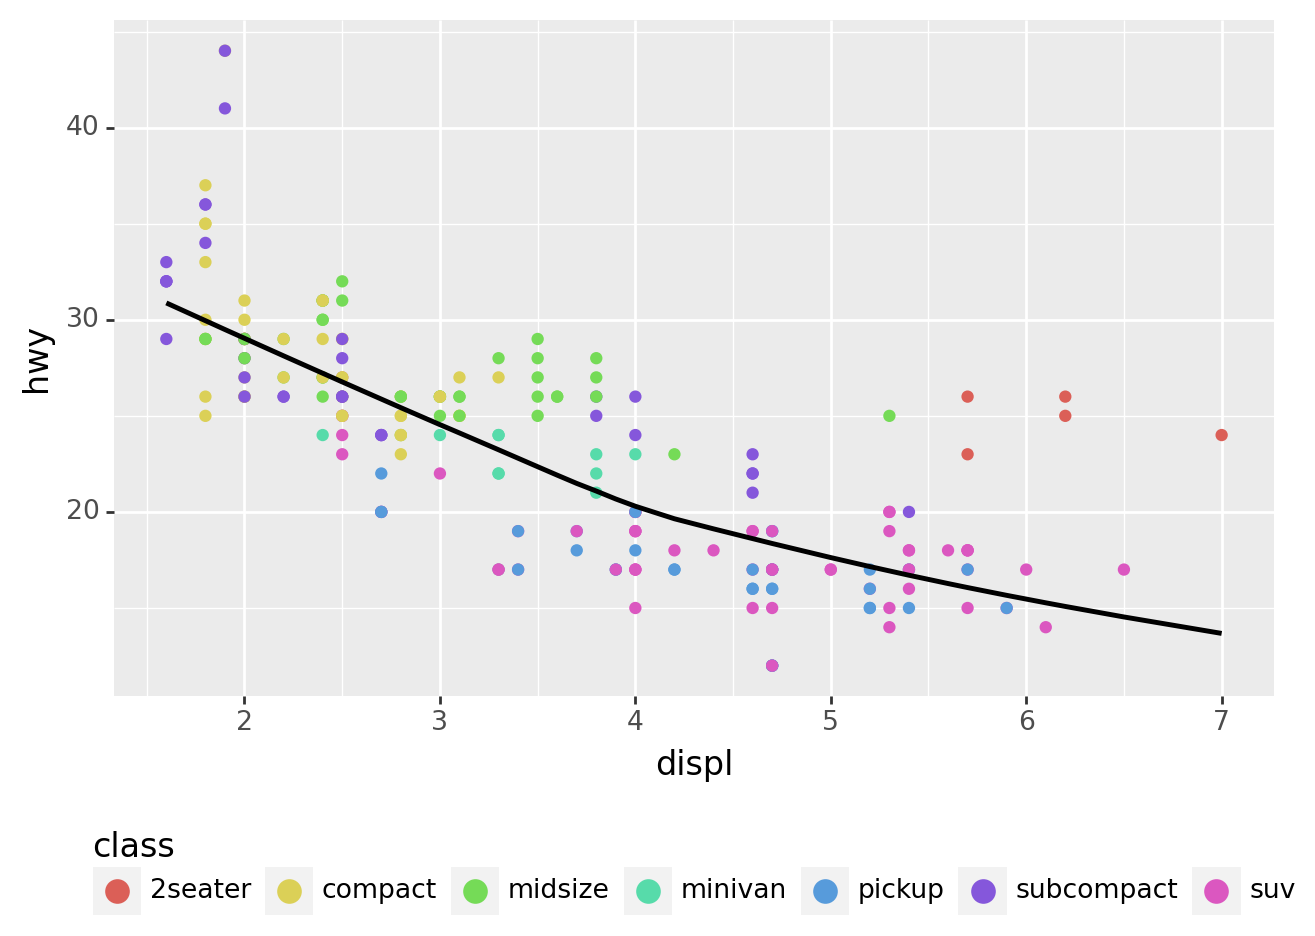

<Figure Size: (640 x 480)>

In [34]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))


## Масштаб и шкала осей

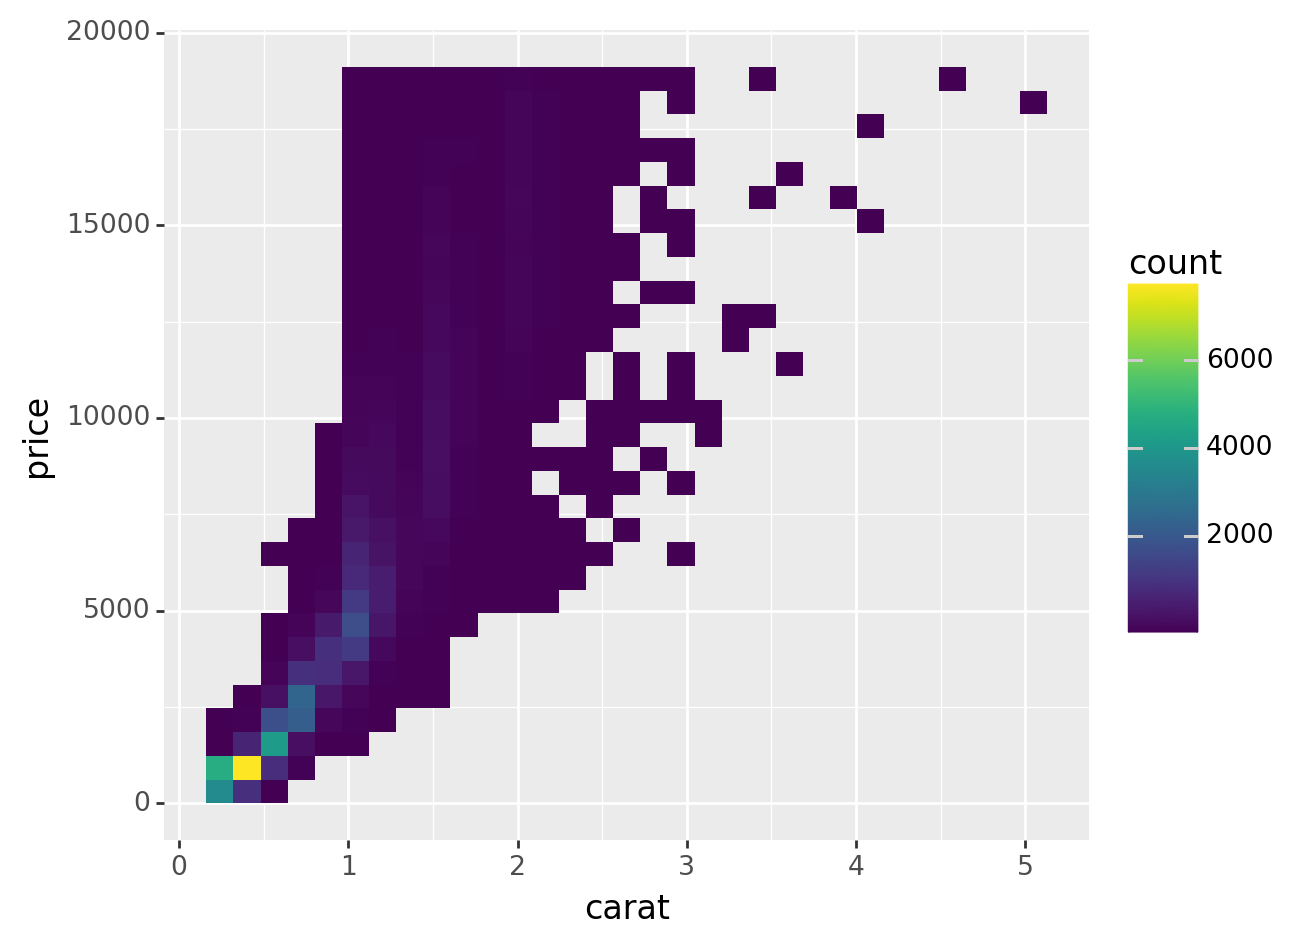

<Figure Size: (640 x 480)>

In [35]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

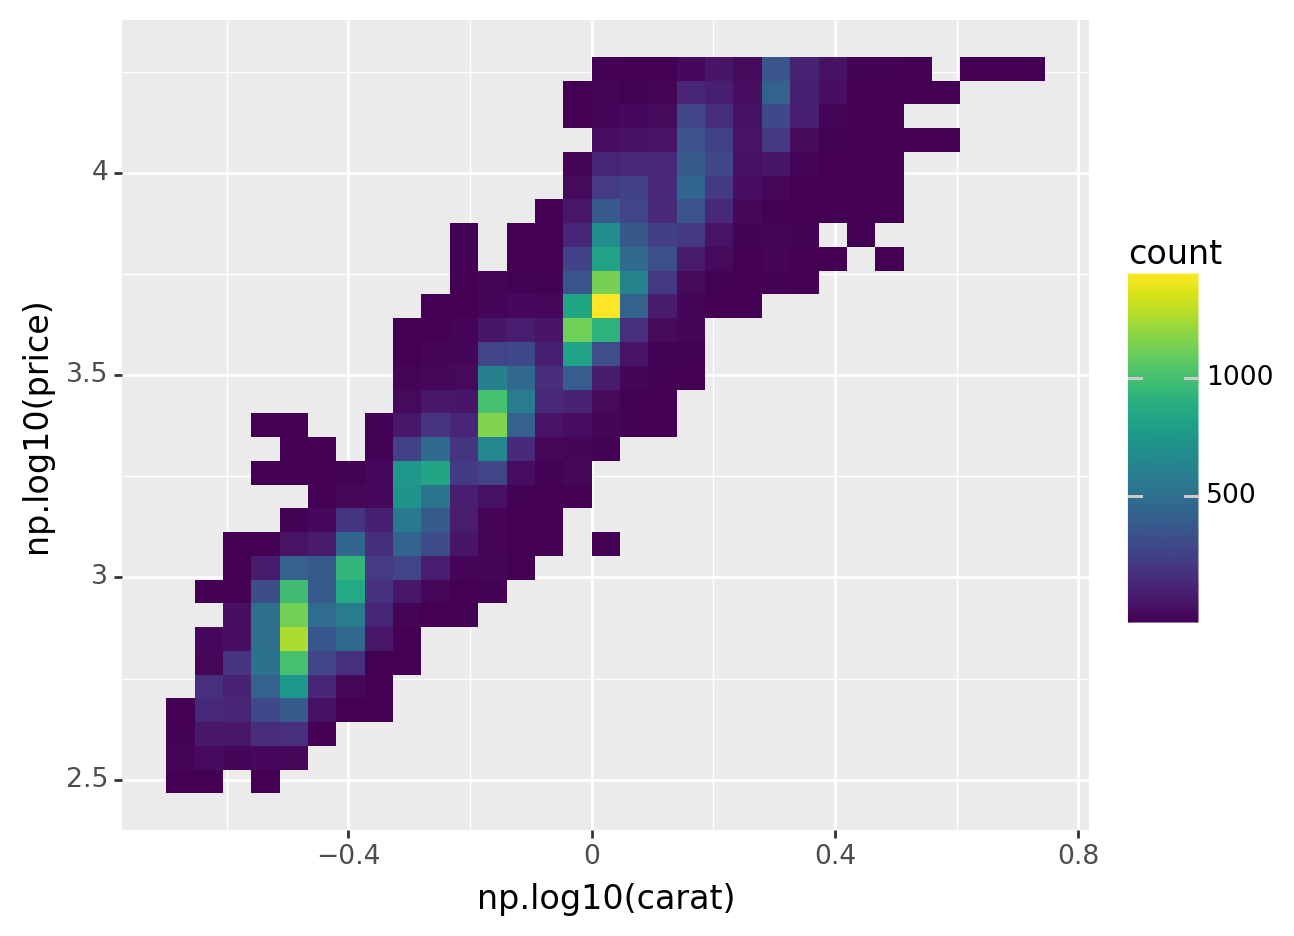

<Figure Size: (640 x 480)>

In [36]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

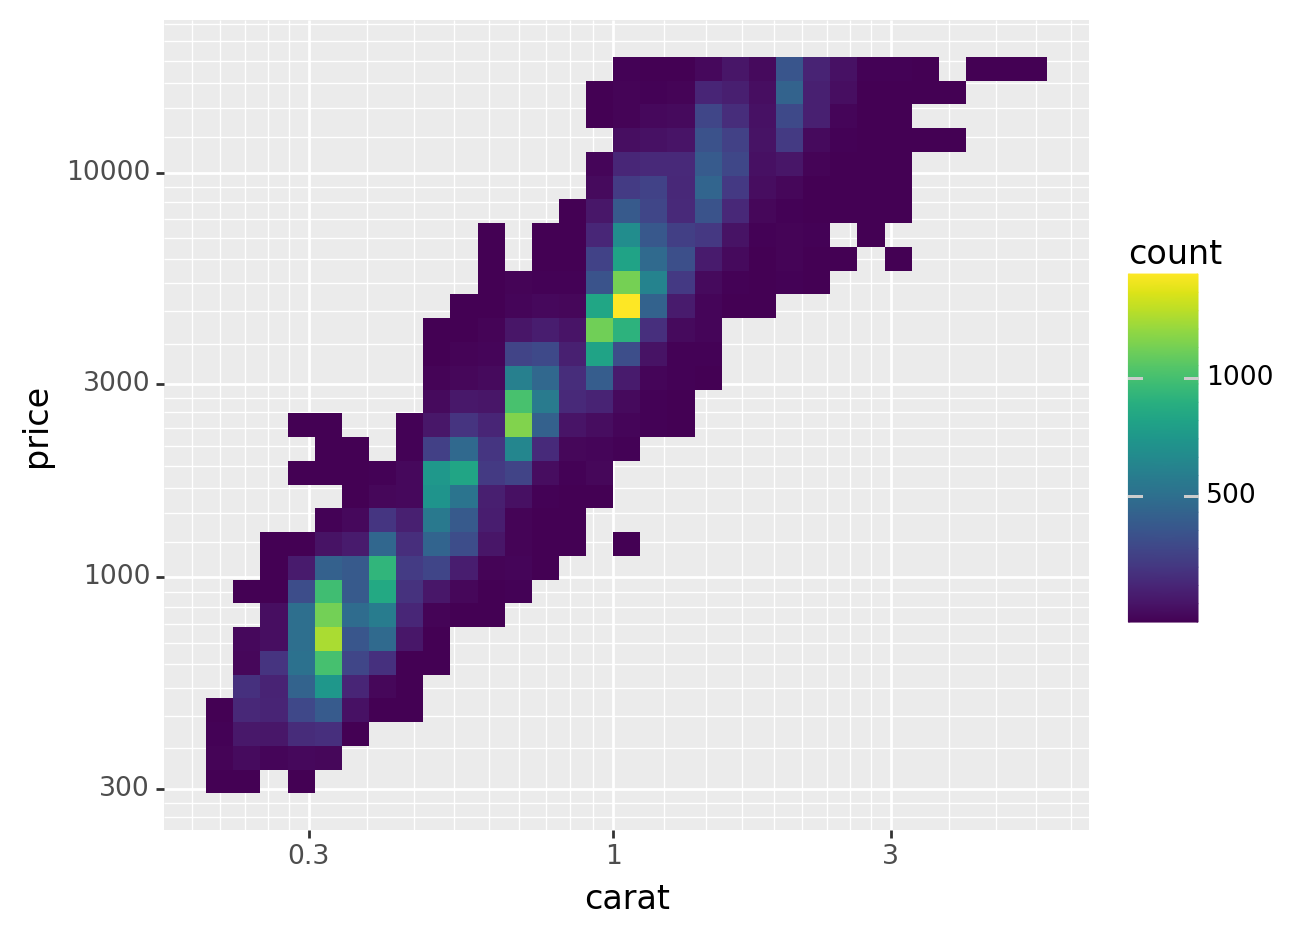

<Figure Size: (640 x 480)>

In [37]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

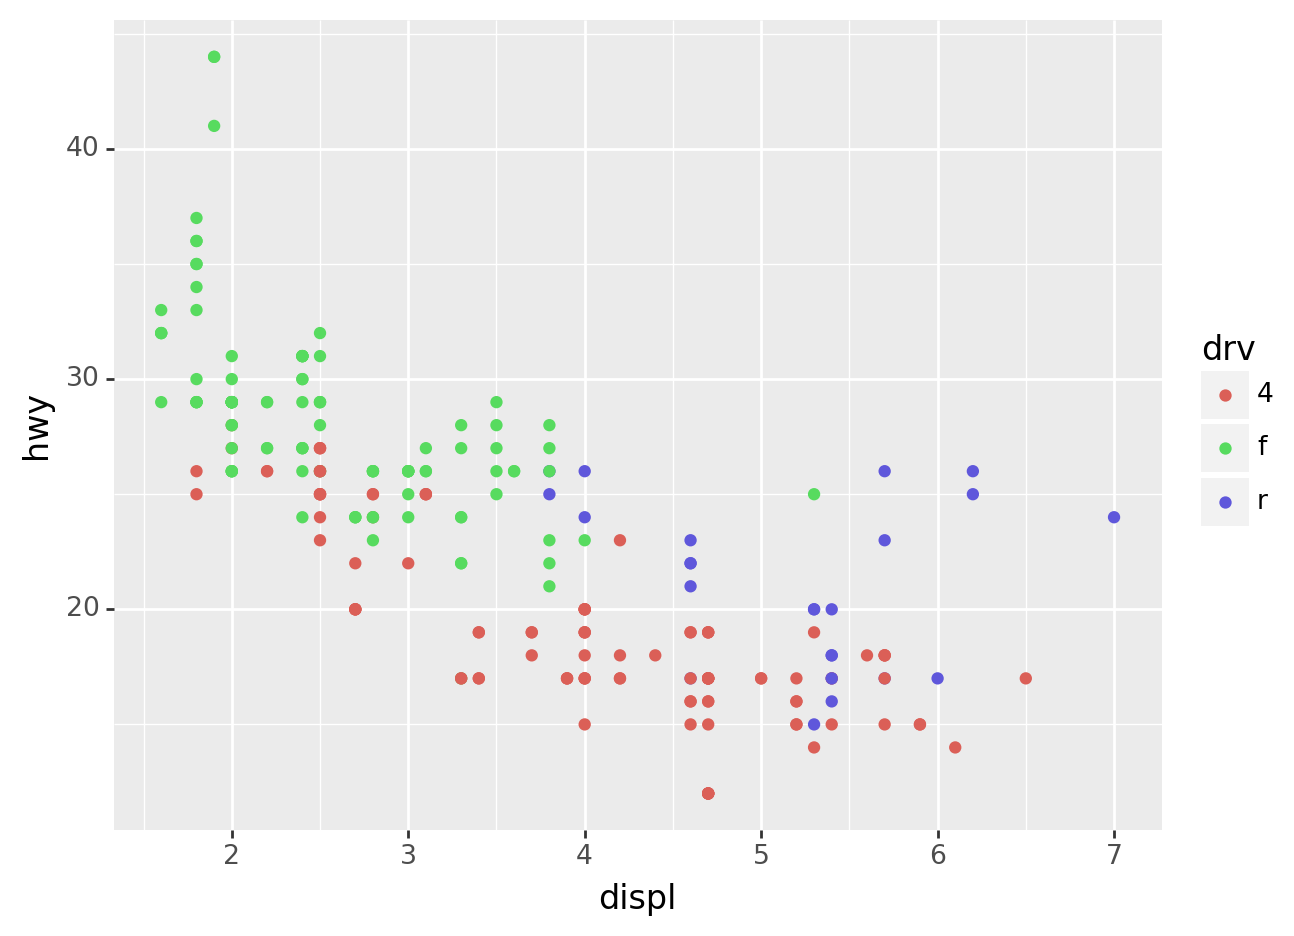

<Figure Size: (640 x 480)>

In [38]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`
Полный список палитр можно найти в разделе [Palettes](https://ggplot2.tidyverse.org/reference/scale_brewer.html#palettes)

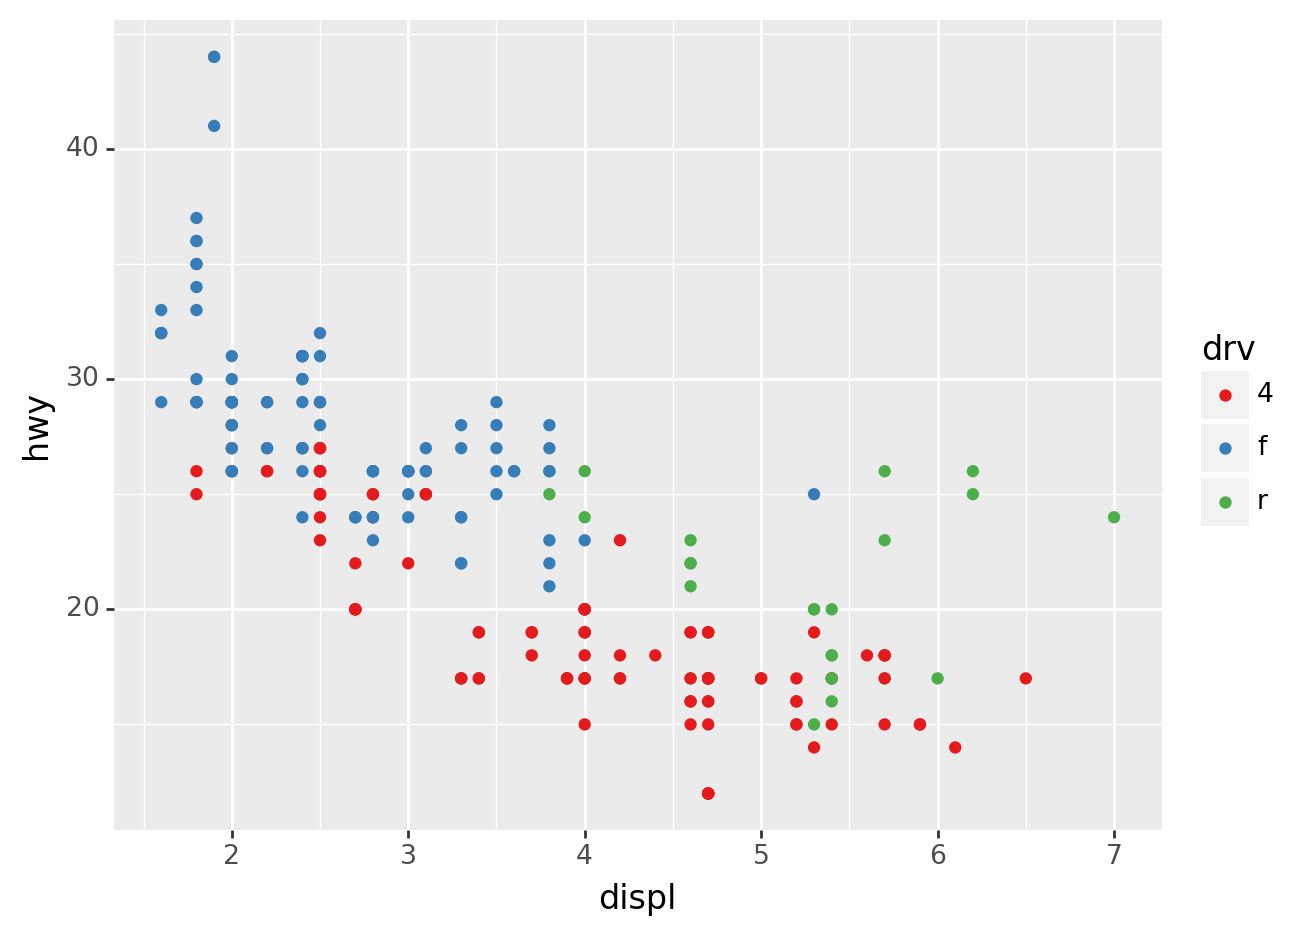

<Figure Size: (640 x 480)>

In [39]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

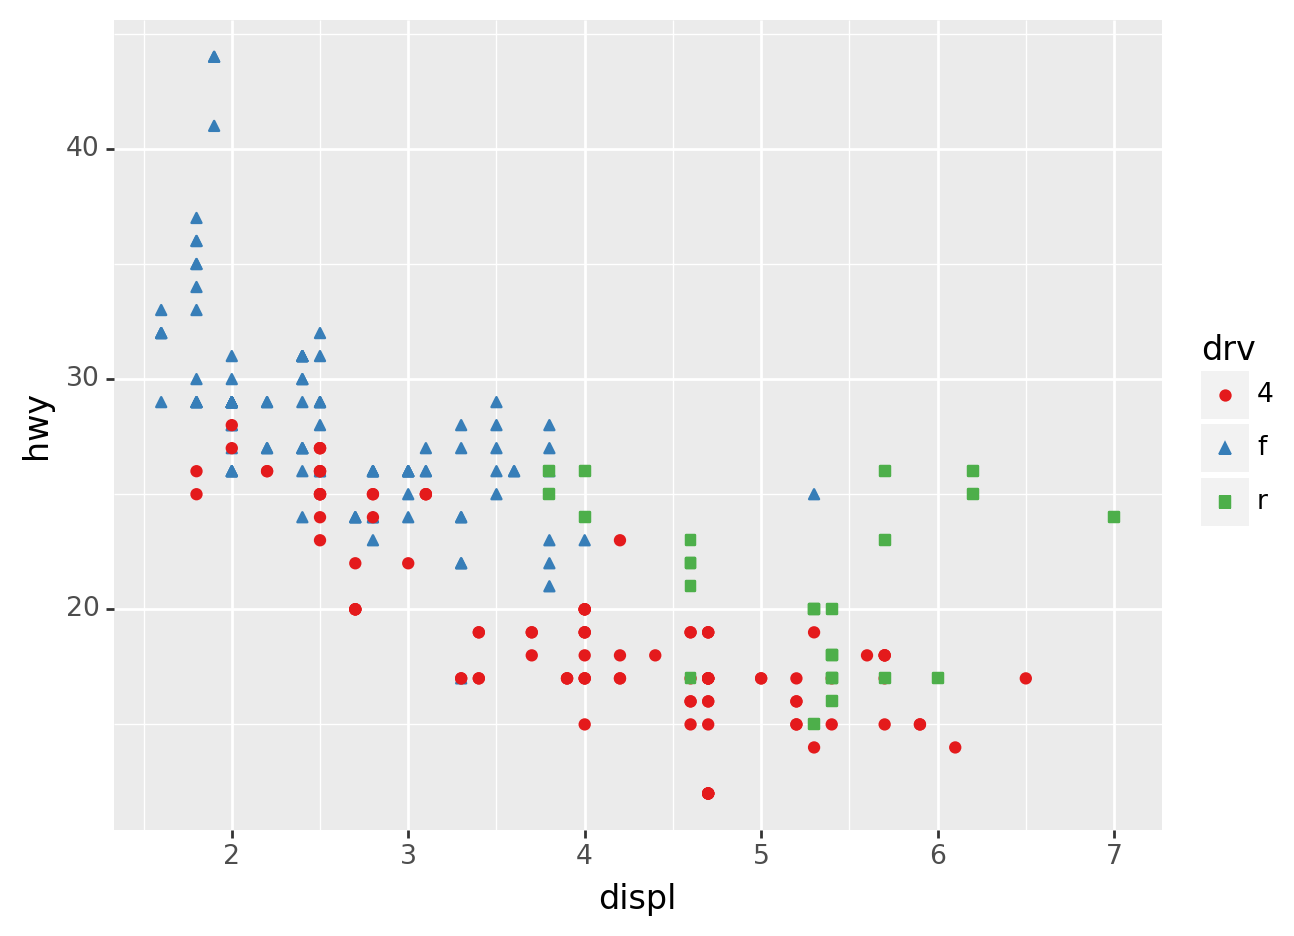

<Figure Size: (640 x 480)>

In [40]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

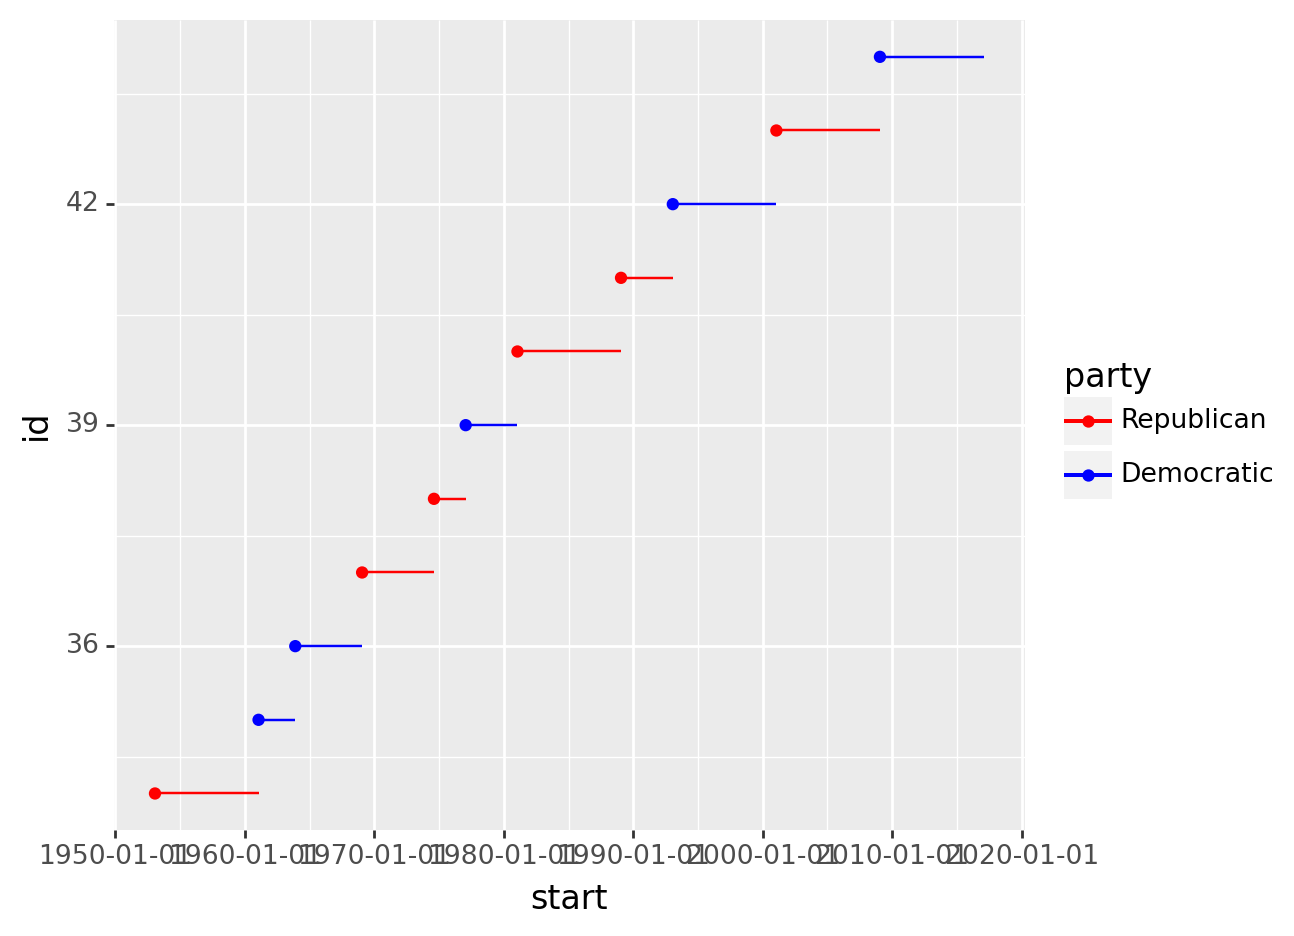

<Figure Size: (640 x 480)>

In [41]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

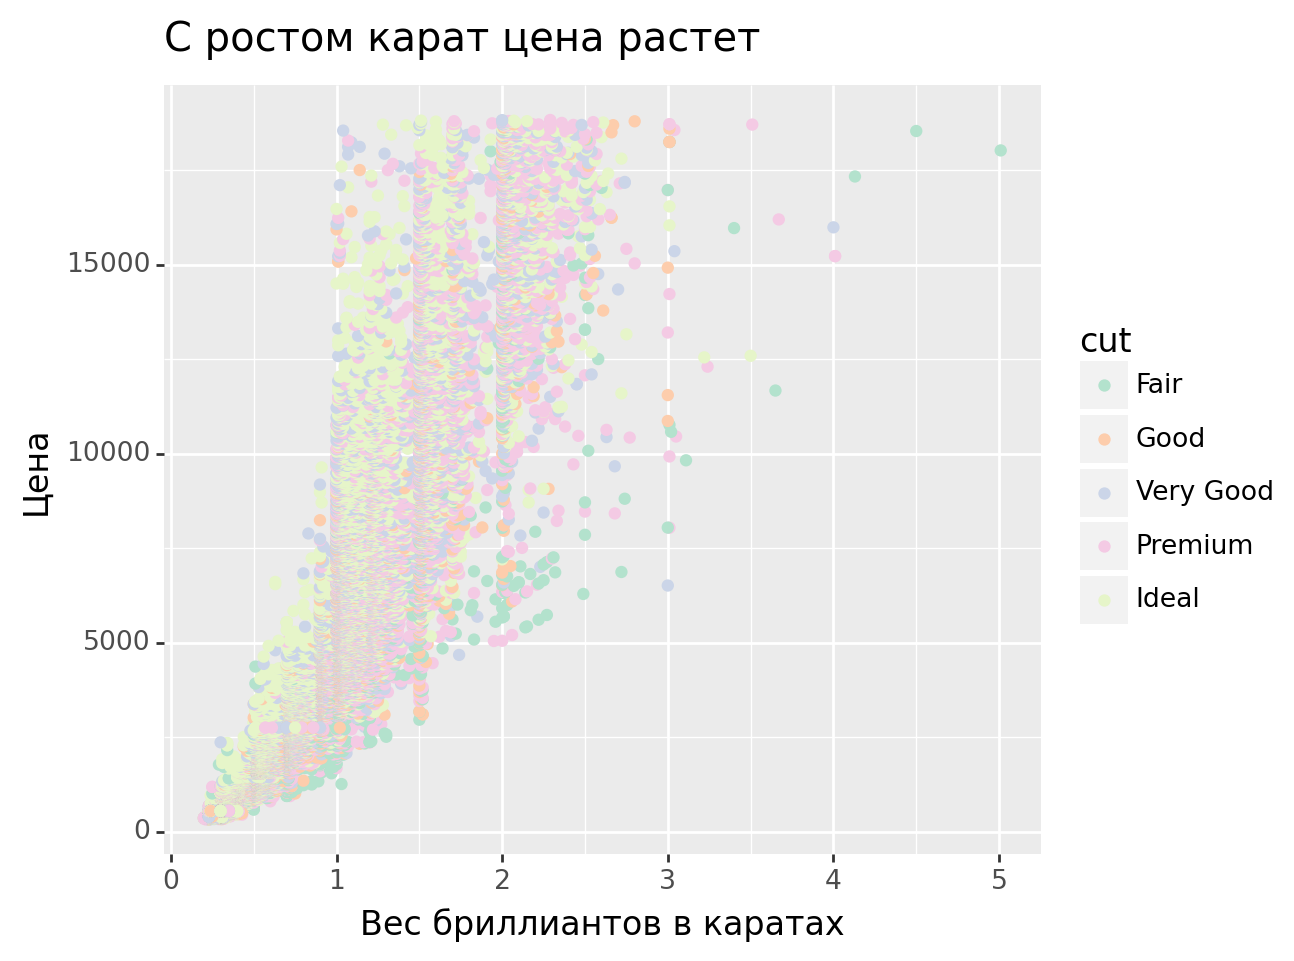

<Figure Size: (640 x 480)>

In [42]:
# Type your code here...
ggplot(data=diamonds, mapping=aes("carat", "price	", color='cut')) +\
labs(title='С ростом карат цена растет', x='Вес бриллиантов в каратах', y='Цена') +\
geom_point() +\
scale_colour_brewer(type="qual", palette="Pastel2")

## Иногда результат зависит от пределов значений на графике

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


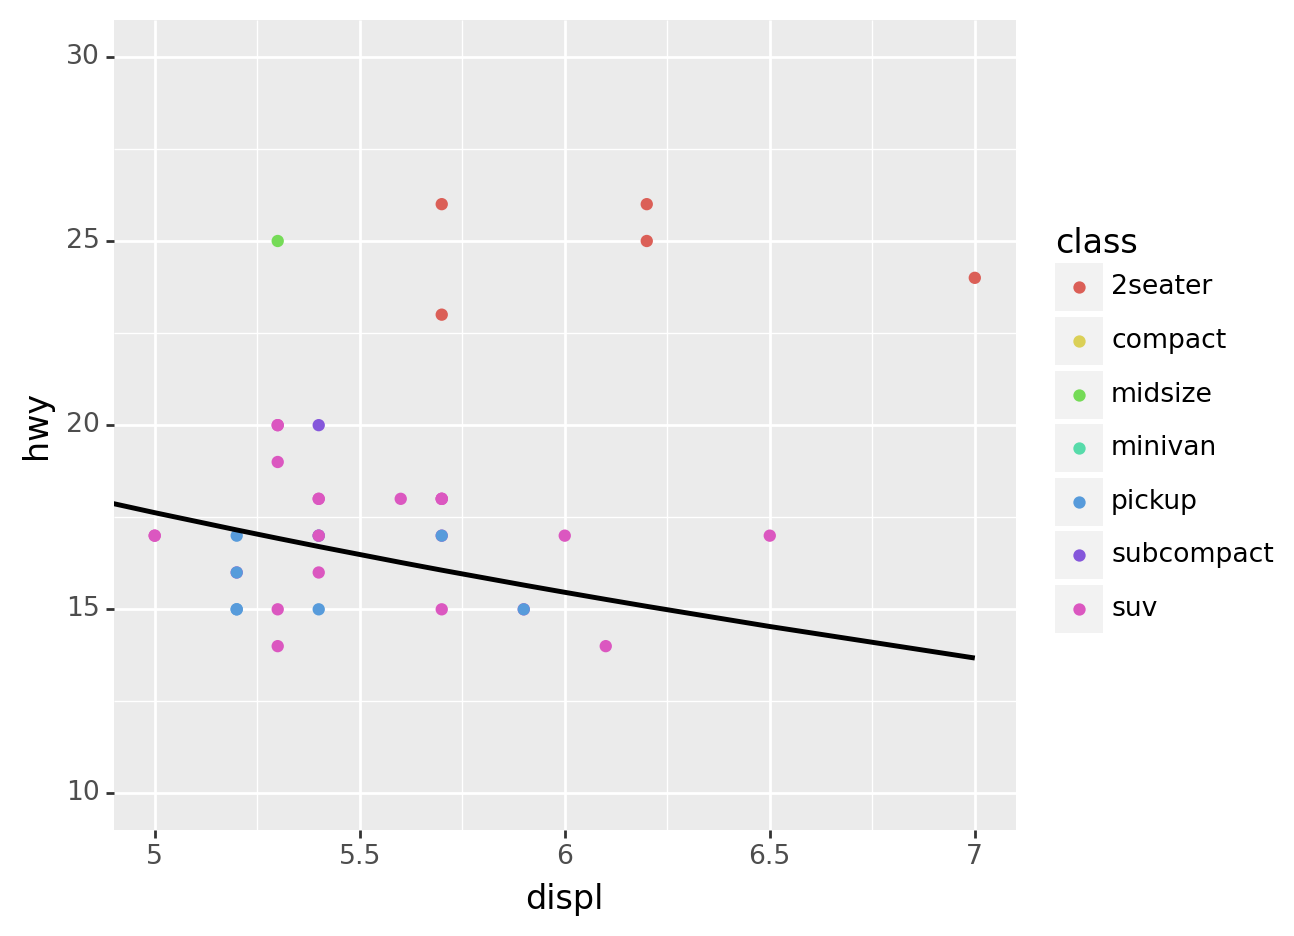

<Figure Size: (640 x 480)>

In [43]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


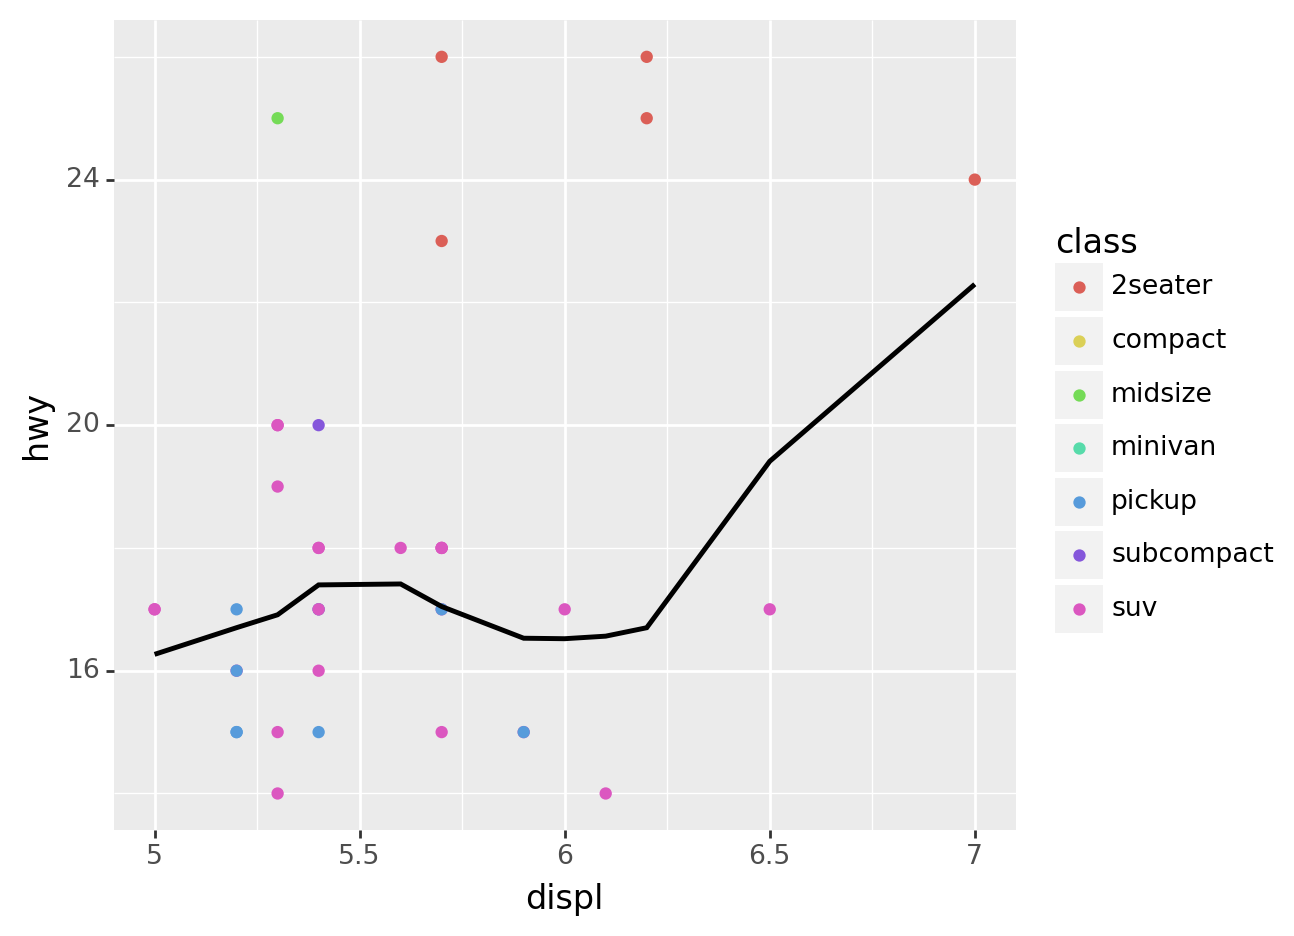

<Figure Size: (640 x 480)>

In [44]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

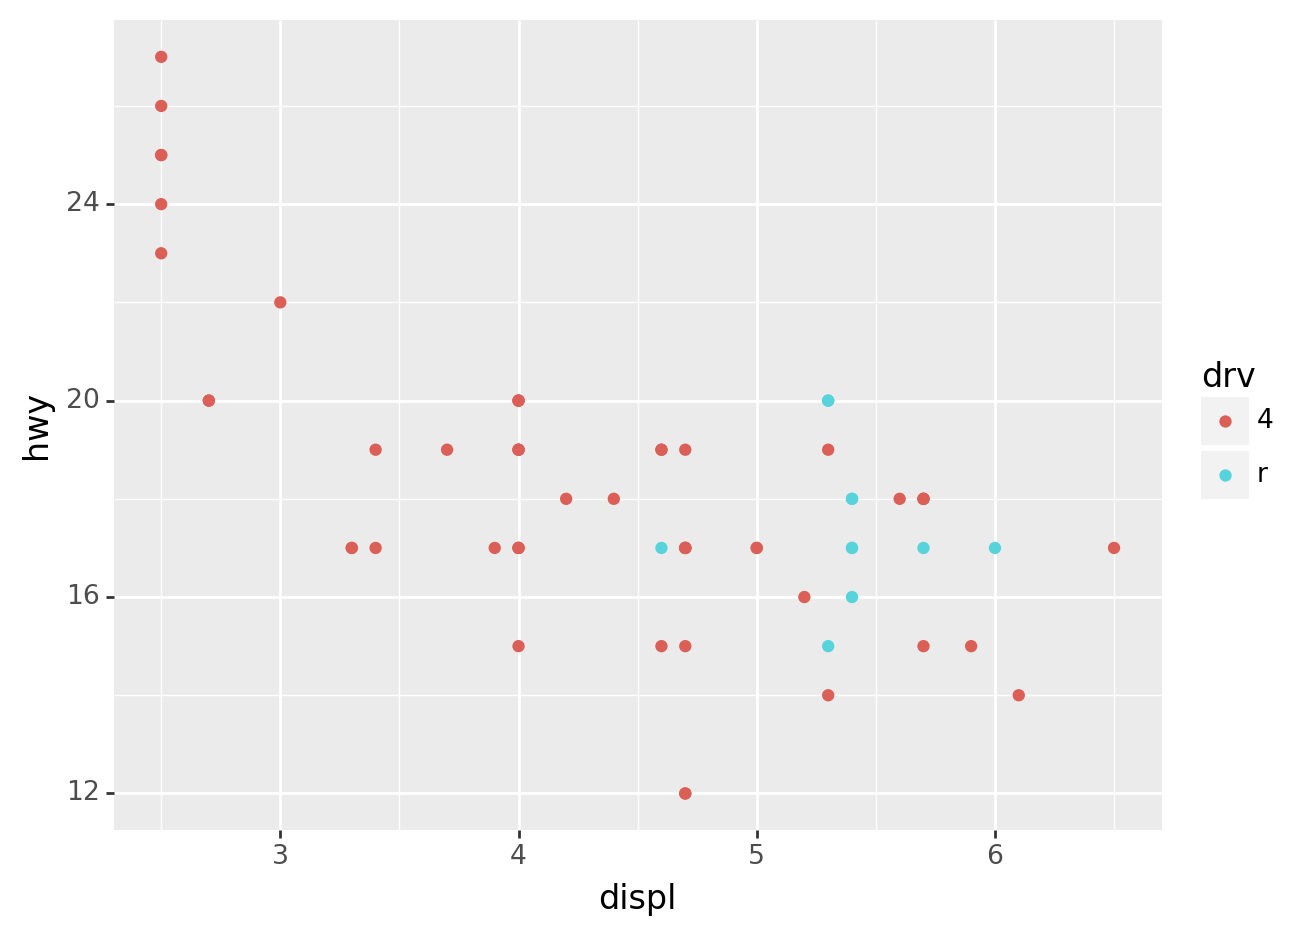

<Figure Size: (640 x 480)>

In [45]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

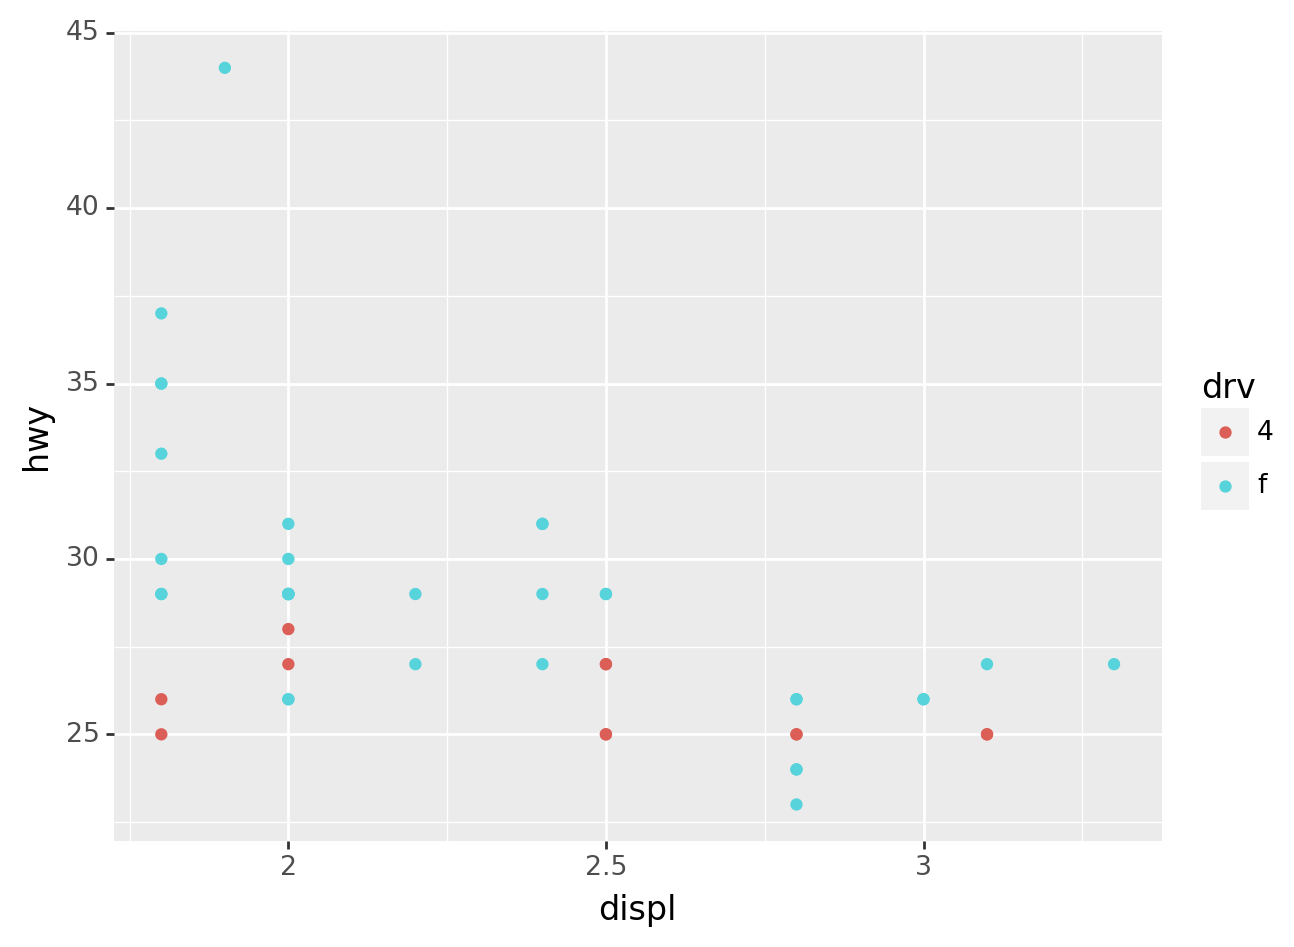

<Figure Size: (640 x 480)>

In [46]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

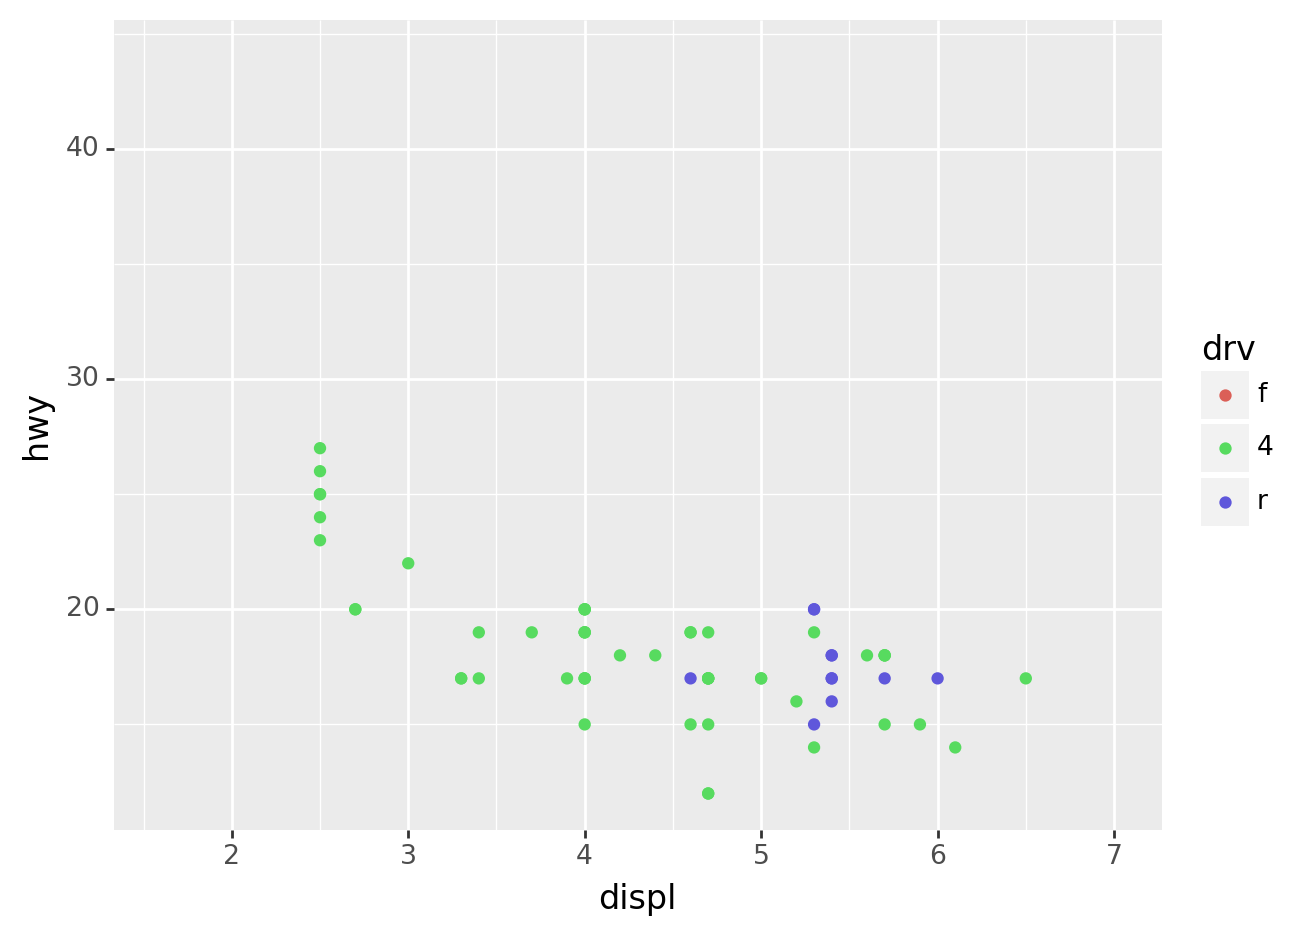

<Figure Size: (640 x 480)>

In [47]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

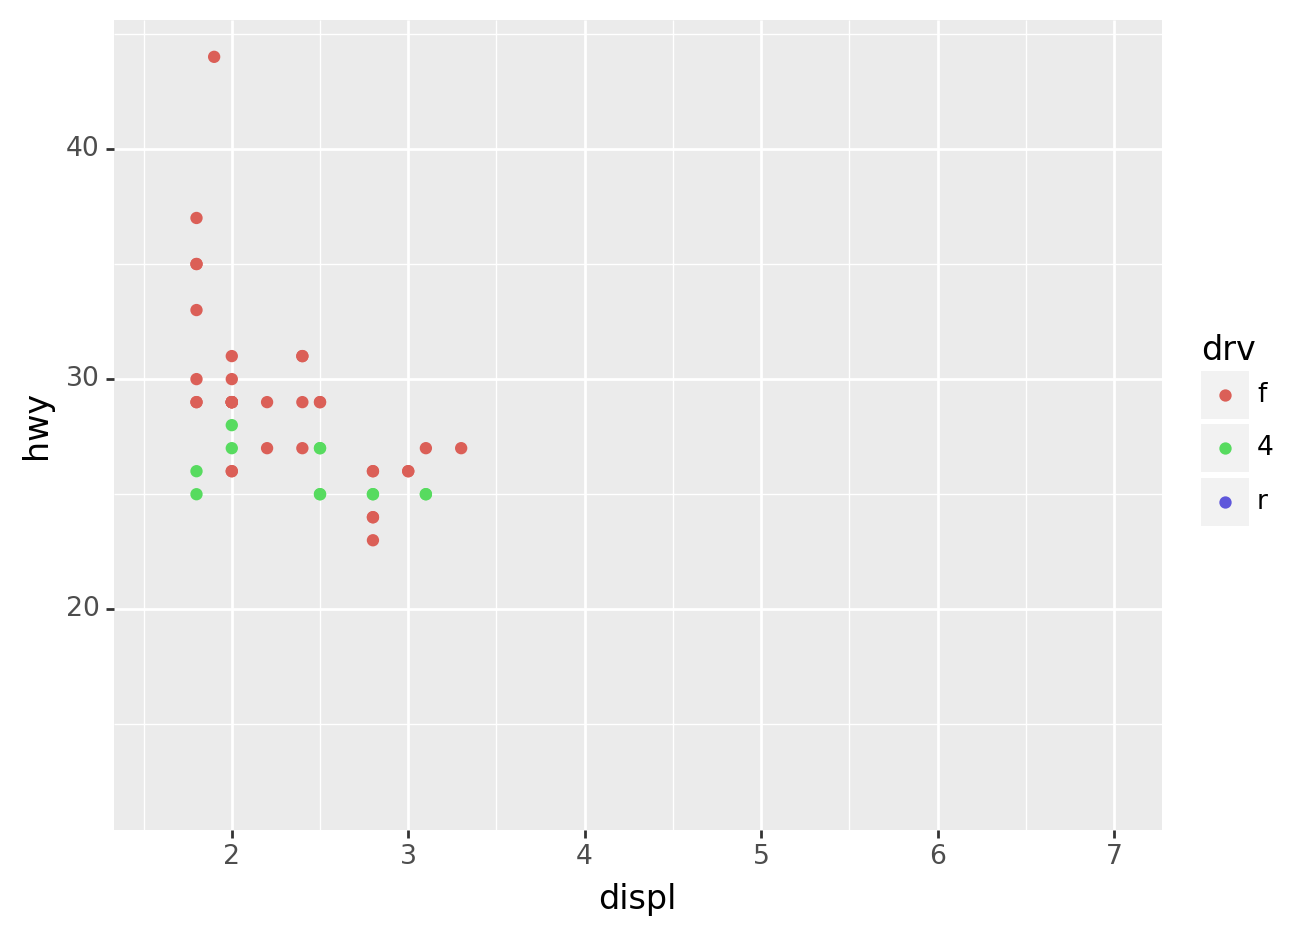

<Figure Size: (640 x 480)>

In [48]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

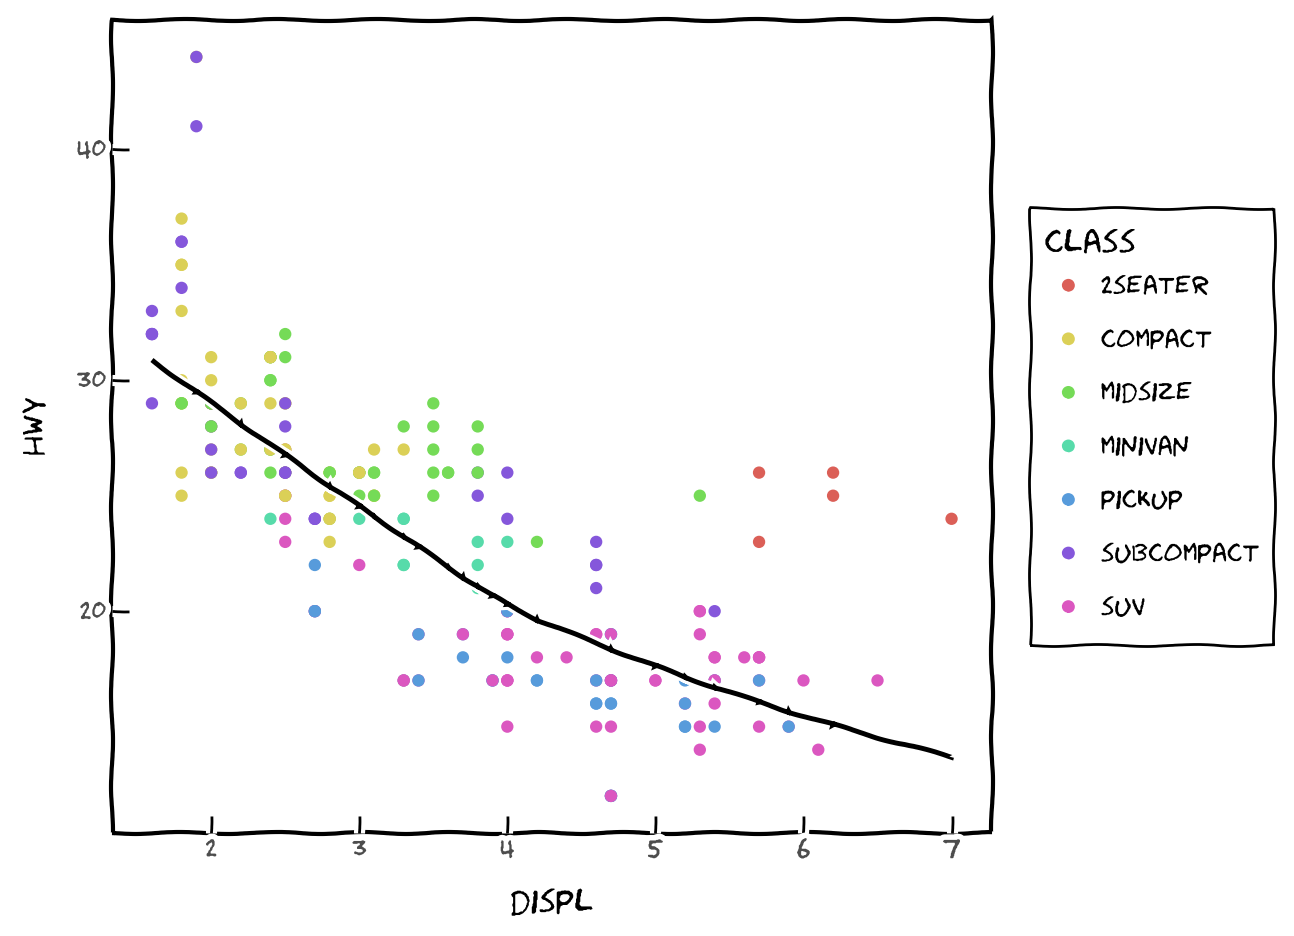

<Figure Size: (640 x 480)>

In [49]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`.

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!